## Imports

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import operator

!pip install dython
from dython.nominal import associations

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Set the option to show all rows.
pd.set_option('display.max_columns', None)

# Load the dataset.
students = pd.read_csv('/kaggle/input/addmisson-data/dataset.csv')

## Data exploration and cleaning

In [4]:
# Show first five rows.
students.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  \
0                      13                      10                    6   
1                       1                       3                    4   
2                      22                      27                   10   
3                      23                      27                    6   
4                      22                      28                   10   

   Father's occupation  Displaced  Educational special needs  Debtor  \
0                   10          1                          0       0   
1                    4          1                          0       0   
2                   10          1                          0       0   
3                    4          1                          0       0   
4                   10          0                          0       0   

   Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
0                        1       1                   0                 20   
1                        0       1                   0                 19   
2                        0       1                   0                 19   
3                        1       0                   0                 20   
4                        1       0                   0                 45   

   International  Curricular units 1st sem (credited)  \
0              0                                    0   
1              0                                    0   
2              0                                    0   
3              0                                    0   
4              0                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0     

The data in most columns is encoded, the specification is provided below.

**Marital status**\
1 - Single |
2 - Married |
3 - Widower |
4 - Divorced |
5 - Facto union |
6 - Legally separated\
\
**Nationality**\
1 - Portuguese |
2 - German |
3 - Spanish |
4 - Italian |
5 - Dutch |
6 - English |
7 - Lithuanian |
8 - Angolan |
9 - Cape Verdean |
10 - Guinean |
11 - Mozambican |
12 - Santomean |
13 - Turkish |
14 - Brazilian |
15 - Romanian |
16 - Moldovan |
17 - Mexican |
18 - Ukrainian |
19 - Russian |
20 - Cuban |
21 - Colombian\
\
**Application mode**\
1 - 1st phase - general contingent |
2 - Ordinance No. 612/93 |
3 - 1st phase - special contingent (Azores Island) |
4 - Holders of other higher courses |
5 - Ordinance No. 854-B/99 |
6 - International student (bachelor) |
7 - 1st phase - special contingent (Madeira Island) |
8 - 2nd phase - general contingent |
9 - 3rd phase - general contingent |
10 - Ordinance No. 533-A/99, item b2 (Different plan) |
11 - Ordinance No. 533-A/99, item b3 (Other institution) |
12 - Over 23 years old |
13 - Transfer |
14 - Change in course |
15 - Technological specialization diploma holders |
16 - Change in institution/course |
17 - Short cycle diploma holders |
18 - Change in institution/course (International)\
\
**Course**\
1 - Biofuel Production Technologies |
2 - Animation and Multimedia Design |
3 - Social Service (evening attendance) |
4 - Agronomy |
5 - Communication Design |
6 - Veterinary Design |
7 - Informatics Engineering |
8 - Equiniculture |
9 - Management |
10 - Social Service |
11 - Tourism |
12 - Nursing |
13 - Oral Hygiene |
14 - Advertising and Marketing Management |
15 - Journalism and Communication |
16 - Basic Education |
17 - Management (evening attendance)\
\
**Previous qualification**\
1 - Secondary education |
2 - Higher education - bachelor's degree |
3 - Higher education - degree |
4 - Higher education - master's degree |
5 - Higher education - doctorate |
6 - Frequency of higher education |
7 - 12th year of schooling - not completed |
8 - 11th year of schooling - not completed |
9 - Other - 11th year of schooling |
10 - 10th year of schooling |
11 - 10th year of schooling - not completed |
12 - Basic education 3rd cycle (9th/10th/11th year) or equivalent |
13 - Basic education 2rd cycle (6th/7th/8th year) or equivalent |
14 - Technological specialization course |
15 - Higher education - degree (1st cycle) |
16 - Professional higher technical course |
17 - Higher education - master's degree (2nd cycle)\
\
**Mother's qualification**\
**Father's qualification**\
1 - Secondary education |
2 - Higher education - bachelor's degree |
3 - Higher education - degree |
4 - Higher education - master's degree |
5 - Higher education - doctorate |
6 - Frequency of higher education |
7 - 12th year of schooling - not completed |
8 - 11th year of schooling - not completed |
9 - 7th year (Old) |
10 - Other - 11th year of schooling |
11 - 2nd year complementary high school course |
12 - 10th year of schooling |
13 - General commerce course |
14 - Basic education 3rd cycle (9th/10th/11th year) or equivalent |
15 - Complementary high school course |
16 - Technical-professional course |
17 - Complementary high school course - not concluded |
18 - 7th year of schooling |
19 - 2nd cycle of the general high school course |
20 - 9th year of schooling - not completed |
21 - 8th year of schooling |
22 - General course of administration and commerce |
23 - Supplementary accounting and administration |
24 - Unknown |
25 - Cannot read and write |
26 - Can read without having a 4th year schooling |
27 - Basic education 1st cycle (4th/5th year) or equivalent |
28 - Basic education 2nd cycle (6th/7th/8th year) or equivalent |
29 - Technological specialization course |
30 - Higher education - degree (1st cycle) |
31 - Specialized higher studies course |
32 - Professional higher technical course |
33 - Higher education - master's degree (2nd cycle) |
34 - Higher education - doctorate (3rd cycle)\
\
**Mother's occupation**\
**Father's occupation**\
1 - Student |
2 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers |
3 - Specialists in Intellectual and Scientific Activities |
4 - Intermediate Level Technicians and Professions |
5 - Administrative staff |
6 - Personal Services, Security and Safety Workers, and Sellers |
7 - Farmers and Skilled Workers in Agriculture, Fisheries,and Forestry |
8 - Skilled Workers in Industry, Construction, and Craftsmen |
9 - Installation and Machine Operators and Assembly Workers |
10 - Unskilled Workers |
11 - Armed Forces Professions |
12 - Other Situation; 13—(blank) |
14 - Armed Forces Officers |
15 - Armed Forces Sergeants |
16 - Other Armed Forces personnel |
17 - Directors of administrative and commercial services |
18 - Hotel, catering, trade, and other services directors |
19 - Specialists in the physical sciences, mathematics, engineering,and related techniques |
20 - Health professionals |
21 - Teachers |
22 - Specialists in finance, accounting, administrative organization,and public and commercial relations |
23 - Intermediate level science and engineering techniciansand professions |
24 - Technicians and professionals of intermediate level of health |
25 - Intermediate level technicians from legal, social, sports, cultural,and similar services |
26 - Information and communication technology technicians |
27 - Office workers, secretaries in general, and data processing operators |
28 - Data, accounting, statistical, financial services, and registry-related operators |
29 - Other administrative support staff |
30 - Personal service workers |
31 - Sellers |
32 - Personal care workers and the like |
33 - Protection and security services personnel |
34 - Market-oriented farmers and skilled agricultural and animal production workers |
35 - Farmers, livestock keepers, fishermen, hunters and gatherers,and subsistence |
36 - Skilled construction workers and the like, except electricians |
37 - Skilled workers in metallurgy, metalworking, and similar |
38 - Skilled workers in electricity and electronics |
39 - Workers in food processing, woodworking, and clothing and other industries and crafts |
40 - Fixed plant and machine operators |
41 - Assembly workers |
42 - Vehicle drivers and mobile equipment operators |
43 - Unskilled workers in agriculture, animal production, and fisheries and forestry |
44 - Unskilled workers in extractive industry, construction,manufacturing, and transport |
45 - Meal preparation assistants |
46 - Street vendors (except food) and street service providers\
\
**Gender**\
1 - male |
0 - female\
\
**Daytime/evening attendance**\
1 - daytime |
0 - evening\
\
**Displaced**\
**Educational special needs**\
**Debtor**\
**Tuition fees up to date**\
**Scholarship holder**\
**International**\
1 - yes |
0 - no

In [5]:
students.shape

(4424, 35)

There are 35 columns and 4,424 rows in the dataset.

In [6]:
# Gather basic information about the data.
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Ranking in certain columns does not make sence and encoding were made for simplification.

In [7]:
students.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [8]:
# Rename column Nacionality.
students.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

# Get all categorical variables except target.
cat_cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 
          'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification", 
          "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 
          'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# Get all continuous variables.
cont_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
             'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
             'Unemployment rate', 'Inflation rate', 'GDP']

# Change categorical columns to category datatype.
students[cat_cols] = students[cat_cols].astype('category')

In [9]:
students.describe()

Age at enrollment  Curricular units 1st sem (credited)  \
count        4424.000000                          4424.000000   
mean           23.265145                             0.709991   
std             7.587816                             2.360507   
min            17.000000                             0.000000   
25%            19.000000                             0.000000   
50%            20.000000                             0.000000   
75%            25.000000                             0.000000   
max            70.000000                            20.000000   

       Curricular units 1st sem (enrolled)  \
count                          4424.000000   
mean                              6.270570   
std                               2.480178   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              26.000000   

       Curricular units 1st sem (evaluations)  \
count                             4424.000000   
mean                                 8.299051   
std                                  4.179106   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 45.000000   

       Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
count                          4424.000000                       4424.000000   
mean                              4.706600                         10.640822   
std                               3.094238                          4.843663   
min                               0.000000                          0.000000   
25%                               3.000000                         11.000000   
50%                               5.000000                         12.285714   
75%                               6.000000                         13.400000   
max                              26.000000                         18.875000   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular un

In [10]:
students.describe(include=['category', 'O'])

Marital status  Application mode  Application order  Course  \
count             4424              4424               4424    4424   
unique               6                18                  8      17   
top                  1                 1                  1      12   
freq              3919              1708               3026     766   

        Daytime/evening attendance  Previous qualification  Nationality  \
count                         4424                    4424         4424   
unique                           2                      17           21   
top                              1                       1            1   
freq                          3941                    3717         4314   

        Mother's qualification  Father's qualification  Mother's occupation  \
count                     4424                    4424                 4424   
unique                      29                      34                   32   
top                          1                      27                   10   
freq                      1069                    1209                 1577   

        Father's occupation  Displaced  Educational special needs  Debtor  \
count                  4424       4424                       4424    4424   
unique                   46          2                          2       2   
top                      10          1                          0       0   
freq                   1010       2426                       4373    3921   

        Tuition fees up to date  Gender  Scholarship holder  International  \
count                      4424    4424                4424           4424   
unique                        2       2                   2              2   
top                           1       0                   0              0   
freq                       3896    2868                3325           4314   

          Target  
count       4424  
unique         3  
top     Graduate  
freq        2209

In [11]:
# Check for missing values.
students.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

There is no missing data according to the results from `isna()` function.

In [12]:
# Check for duplicates.
students.duplicated().sum()

0

There is no duplicated data according to the results from `duplicated()` function.

## Exploratory data analysis

Make a copy of existing dataset, so we can perform manipulations without affecting the original dataset.

In [13]:
df = students.copy()

In [46]:
# Let's use this color palette.
sns.color_palette("Set3", 10)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353)]

In [56]:
# Adjust some seaborn settings.
colors = sns.color_palette('Set3')
sns.set_palette('Set3')
sns.set_style('ticks')
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8'})

# Assign each categorical variable its own color.
colors_gender = {'Female': colors[0], 'Male': colors[1]}
colors_attendance = {'Evening': colors[0], 'Daytime': colors[1]}
colors_binary = {'Yes': colors[0], 'No': colors[1]}
colors_target = {'Graduate': colors[-1], 'Dropout': colors[-2], 'Enrolled': colors[4]}

### Target

First, we will explore our `Target` variable, which we will predict by our model.

In [57]:
# Show all unique values of target variable.
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

Create a pie chart that depicts the proportions of total number of dropout, total number of graduated, and total number of enrolled students.\
Create a bar chart that shows the total number of dropout, total number of graduated, and total number of enrolled students.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


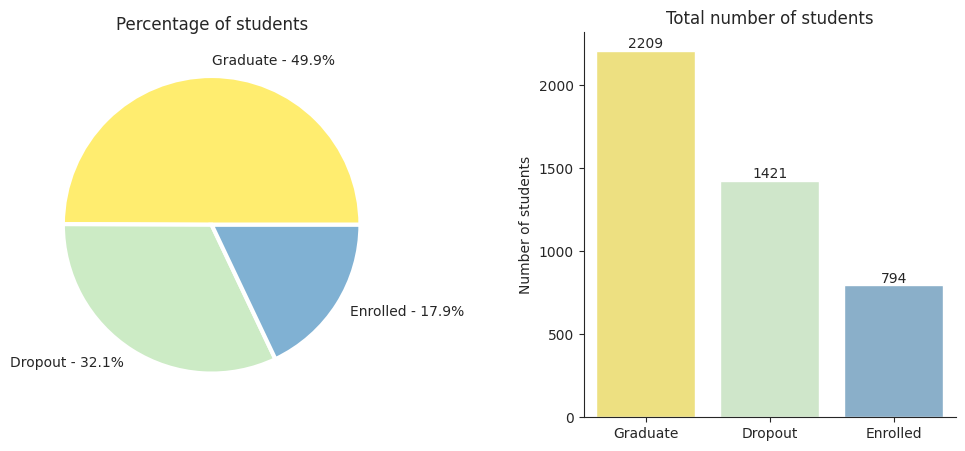

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Target'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, 
        colors=[colors_target.get(i) for i in data.index])
ax1.set_title('Percentage of students')

# Create a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y='count', x=data.index, palette=colors_target)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.bar_label(container=ax2.containers[0], labels=df['Target'].value_counts())
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of students')

plt.show()

The number of graduated students is more than the number of dropout students.\
The total number of graduated and dropout students is 2209 + 1421 = 3630, which is the number of observations for building our model.\
There are currently enrolled 18% of the total number of students or 794, the number students we will use our model for.

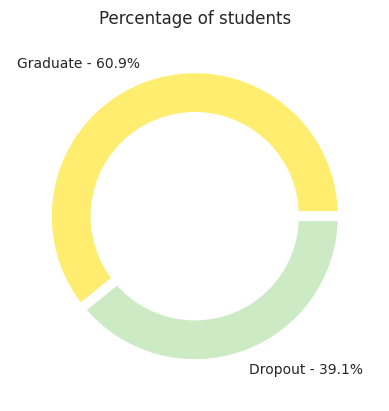

In [59]:
# Exclude currently enrolled students.
data = df[df['Target'] != 'Enrolled']['Target'].value_counts()

# Create a pie chart.
circle = plt.Circle((0,0), 0.7, color='white')
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
plt.pie(data, labels=labels, wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white'}, 
        colors=[colors_target.get(i) for i in data.index])
plt.title('Percentage of students')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

By looking at the pie chart we can suggest that every 6 out of 10 students were successfully graduated, on the other hand every 4 out of 10 students were dropped out. In other words, each $3^{rd}$ student might be in a risk of dropping out of the course.

### Gender

Explore `Gender` variable, look for patterns, investigate its relation to the target variable.

In [60]:
# Replace 0 and 1 values with Female and Male respectively.
df = df.replace({'Gender': {0: 'Female', 1: 'Male'}})

Create a pie chart that depicts the proportions of total number of female, and total number of male students.\
Create a bar chart that shows the total number of female, and total number of male students.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


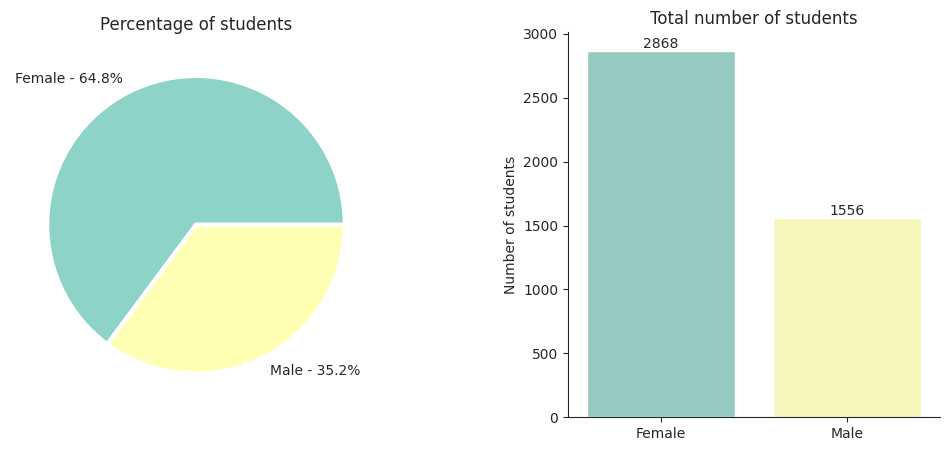

In [61]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Gender'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, 
        colors=[colors_gender.get(i) for i in data.index])
ax1.set_title('Percentage of students')

# Create a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y='count', x=data.index, palette=colors_gender)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.bar_label(container=ax2.containers[0], labels=df['Gender'].value_counts())
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of students')

plt.show()

There are more female students than male students in the dataset.\
The number of female students is 30% higher.\
The dataset is slightly imbalanced, however it should not significantly affect the future model.

Create a stacked bar chart that shows the total number of dropout, total number of graduated, and total number of enrolled students in both gender groups.\
Create a pie chart that depicts the proportions of total number of dropout and total number of graduated female students.\
Create a pie chart that depicts the proportions of total number of dropout and total number of graduated male students.

/tmp/ipykernel_47/4176800288.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(['Gender', 'Target']).size().reset_index().pivot(columns='Gender', index='Target', values=0)


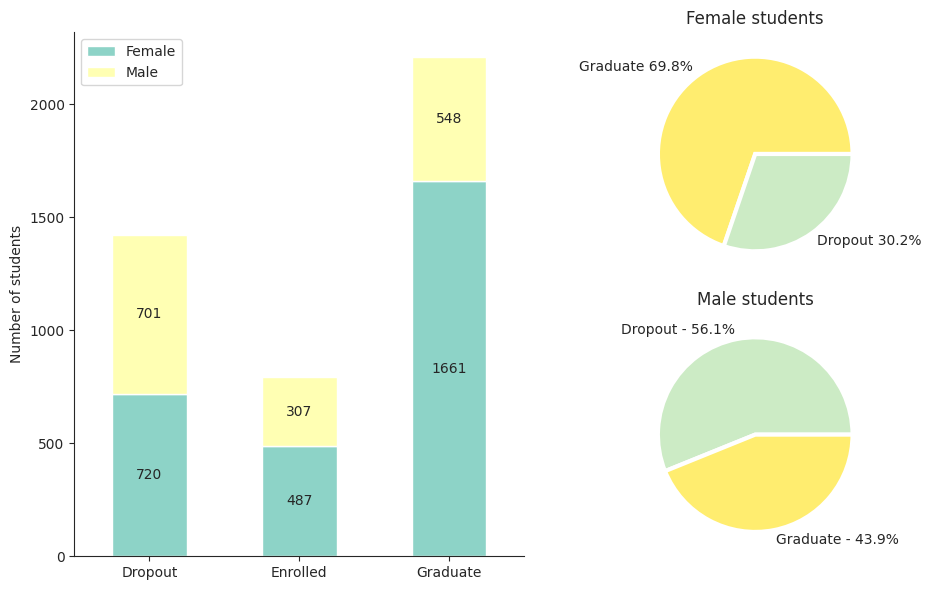

In [62]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)

# Create a stacked barchart.
ax1 = fig.add_subplot(gs[:, 0])
data = df.groupby(['Gender', 'Target']).size().reset_index().pivot(columns='Gender', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_gender.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)
    
# Create a pie chart for female students.
females = df[(df['Gender'] == 'Female') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} {np.round(females[label] / females.sum() * 100, 1)}%' for label in females.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(females, labels=labels, colors=[colors_target.get(i) for i in females.index], 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Female students')

# Create a pie chart for male students.
males = df[(df['Gender'] == 'Male') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} - {np.round(males[label] / males.sum() * 100, 1)}%' for label in males.index]
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(males, labels=labels, colors=[colors_target.get(i) for i in males.index], 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Male students')
    
plt.show()

The number of dropout female and male students is almost equal.\
There are enrolled slightly more female students than male students.\
The number of graduated female students is around 3 times higher than male students.\
The female students graduation rate is higher than the graduation rate for male students.\
On the other hand, the percentage of dropout male students is higher than the percentage of graduated male students (56% and 44% respectively).

### Age at enrollment

Explore `Age at enrollment` variable, look for patterns, investigate its relation to the target variable.

Create a box plot and histogram that show the distribution of students age.

In [63]:
# Find the optimal number of bins using Sturges’ rule.
bins = int(math.ceil(math.log2(len(df))) + 1)
age_min = df['Age at enrollment'].min()
age_max = df['Age at enrollment'].max()
bin_int = df['Age at enrollment'].max() // bins
bin_edges = [i for i in range(age_min, age_max + bin_int, bin_int)]

# Perform binning on Age at enrollment column.
age_labels = [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)]
df['Age at enrollment bins'] = pd.cut(df['Age at enrollment'], bin_edges, labels=age_labels)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


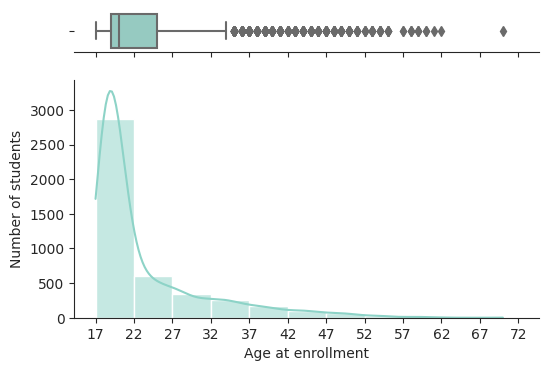

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 4), gridspec_kw={"height_ratios": (.15, .85)})

# Create a boxplot.
ax1 = sns.boxplot(data=df, x='Age at enrollment', ax=ax1)
ax1.set(xlabel=None)

# Create a histogram.
labels = df['Age at enrollment'].value_counts()
labels = [f'{label} - {round(males[label] / males.sum() * 100)}%' for label in males.index]
ax2 = sns.histplot(data=df, x='Age at enrollment', ax=ax2, bins=bins, binwidth=bin_int, kde=True)
ax2.set(ylabel='Number of students')
sns.despine(ax=ax1, left=True)
sns.despine(ax=ax2)


# Adjust x ticks.
plt.xticks(bin_edges)
plt.show()

The vast majority of students are 17-22 years old.\
The number of students decreases as the students age increases.

Create a histogram that shows the distribution of students age of dropout, graduated, and enrolled students.\
Create a stacked bar plot that shows the proportion of dropout, and enrolled students in different age groups.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

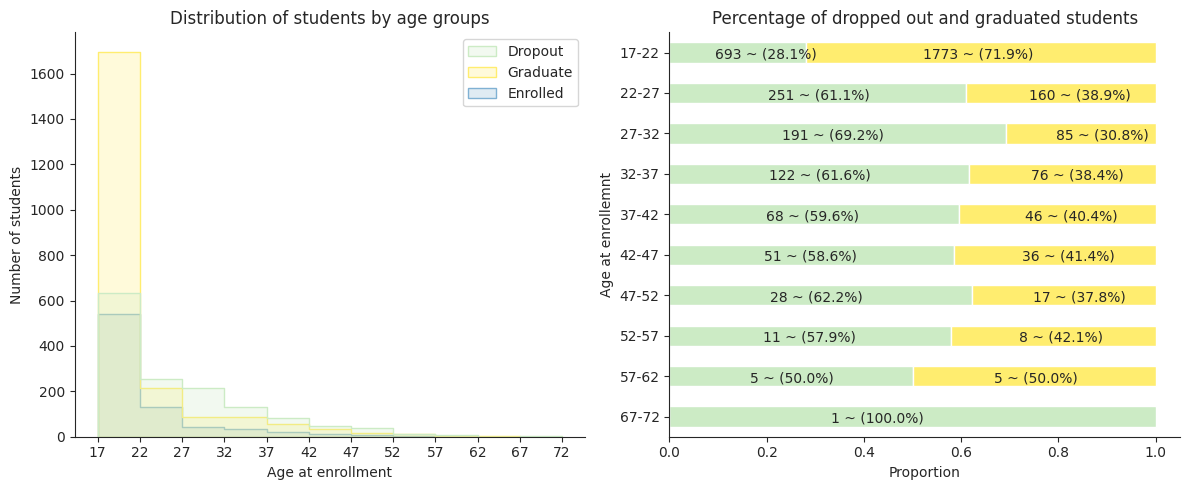

In [65]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create a histogram.
ax1 = fig.add_subplot(gs[0, 0])
ax1 = sns.histplot(data=df, x='Age at enrollment', hue='Target', element='step', bins=bins, 
                  binwidth=bin_int, palette=colors_target)
ax1.set(ylabel='Number of students')
ax1.legend_.set_title(None)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Distribution of students by age groups')
plt.xticks([i for i in range(age_min, age_max + bin_int, bin_int)])

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Age at enrollment bins'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Age at enrollment bins'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
labels = [i for i in age_labels if i in data.index]
data_prop.loc[labels[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Age at enrollemnt')
ax2.get_legend().remove()
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[labels[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        if proportion:
            plt.text(x=(y_loc - proportion) + (proportion / 3), y=n - 0.15, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')
        
plt.show()

The highest graduation rate has the age group 17-22 with 72% of graduated students and 28% of dropped out srudents.\
There is no definitive distinction between other age groups, except 67-72 where only 1 student was dropped out.

### Nationality

Explore `Nationality` variable, look for patterns, investigate its relation to the target variable and determine whether it is good for prediction or not.

In [66]:
# Replace numerical values with their verbal analogs.
df[['Nationality']] = df[['Nationality']].replace({'Nationality': {1: 'Portuguese', 2: 'German', 3: 'Spanish', 
                                                               4: 'Italian', 5: 'Dutch', 6: 'English', 
                                                               7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean', 
                                                               10: 'Guinean', 11: 'Mozambican', 12: 'Santomean', 
                                                               13: 'Turkish', 14: 'Brazilian', 15: 'Romanian', 
                                                               16: 'Moldovan', 17: 'Mexican', 18: 'Ukrainian', 
                                                               19: 'Russian', 20: 'Cuban', 21: 'Colombian'}})

From the descriptive statistics we can see that one particular nationality appears 4,314. This is almost 98% of the whole dataset.

Create a count chart that depicts the total number of dropout students, graduate students, and enrolled students based on nationality.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


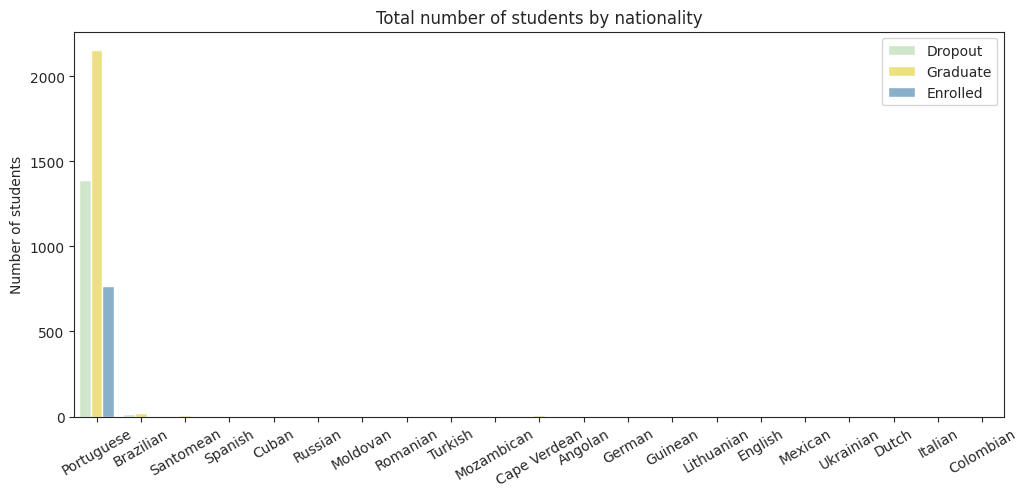

In [67]:
# Create a count plot.
fig, ax = plt.subplots(figsize=(12, 5))
order = df[df['Target'] == 'Enrolled']['Nationality'].value_counts()
ax = sns.countplot(data=df, x='Nationality', hue='Target', palette=colors_target, order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by nationality')
plt.xticks(rotation=30)
ax.legend_.set_title(None)
plt.show()

The vast majority of students are Portuguese. The variable `Nationality` is highly imbalanced.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


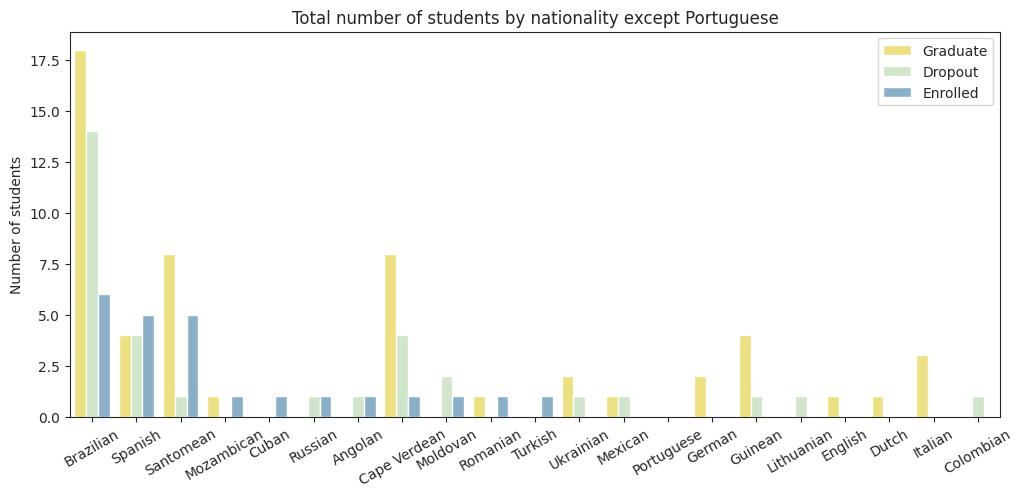

In [68]:
# Create a count plot wothout Portuguese students.
fig, ax = plt.subplots(figsize=(12, 5))
data = df[df['Nationality'] != 'Portuguese']
order = data[data['Target'] == 'Enrolled']['Nationality'].value_counts()
ax = sns.countplot(data=data, x='Nationality', hue='Target', palette=colors_target, order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by nationality except Portuguese')
plt.xticks(rotation=30)
ax.legend_.set_title(None)
plt.show()

There is no pattern to be seen in above plots.

### Marital status

Explore `Marital status` variable, look for patterns, investigate its relation to the target variable and determine whether it is good for prediction or not.

In [69]:
# Replace 1 - Single, 2 - Married, 3 - Widower, 4 - Divorced, 5 - Facto union, and 6 - Legally separated.
df = df.replace({'Marital status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 
                                    5: 'Facto union', 6: 'Legally separated'}})

Create a barplot that shows the number of students in following marital status groups: single, married, divorced, facto union, widower, and legally.\
Create a stacked bar plot that shows the proportion of dropout, and enrolled students in different marital status groups.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


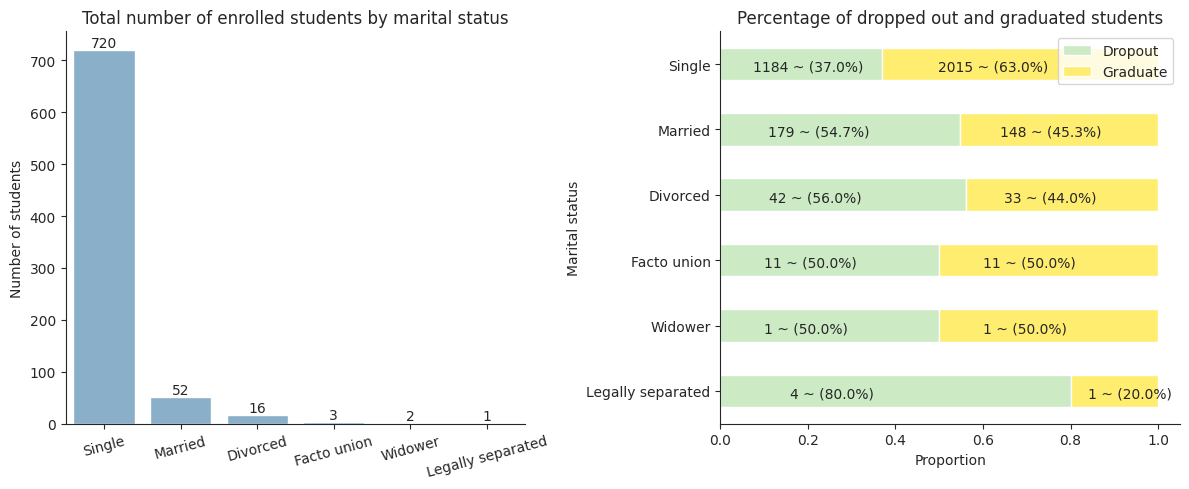

In [70]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create a bar plot.
ax1 = fig.add_subplot(gs[0, 0])
data = df[df['Target'] == 'Enrolled']['Marital status'].value_counts()
order = data.index
ax1 = sns.barplot(data=data.to_frame(), y='count', x=data.index, color=colors[4], order=order)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.bar_label(container=ax1.containers[0], labels=data)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Total number of enrolled students by marital status')
plt.xticks(rotation=15)

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Marital status'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Marital status'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Marital status')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

The majority of enrolled students are single.\
The percentage of single students who graduated is higher than the percentage of students who dropped out.\
Students with a marital status `Legally separated` have the highest percentage of dropouts.\
The distribution of droput and graduate students within other groups is similar and no pattern can be seen.

### Application mode

Explore `Application mode` variable, look for patterns, investigate its relation to the target variable and determine whether it is good for prediction or not.

Create a barplot that shows the number of students based on the application mode.\
Create a stacked bar plot that shows the proportion of dropout, and enrolled students in different application mode groups.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


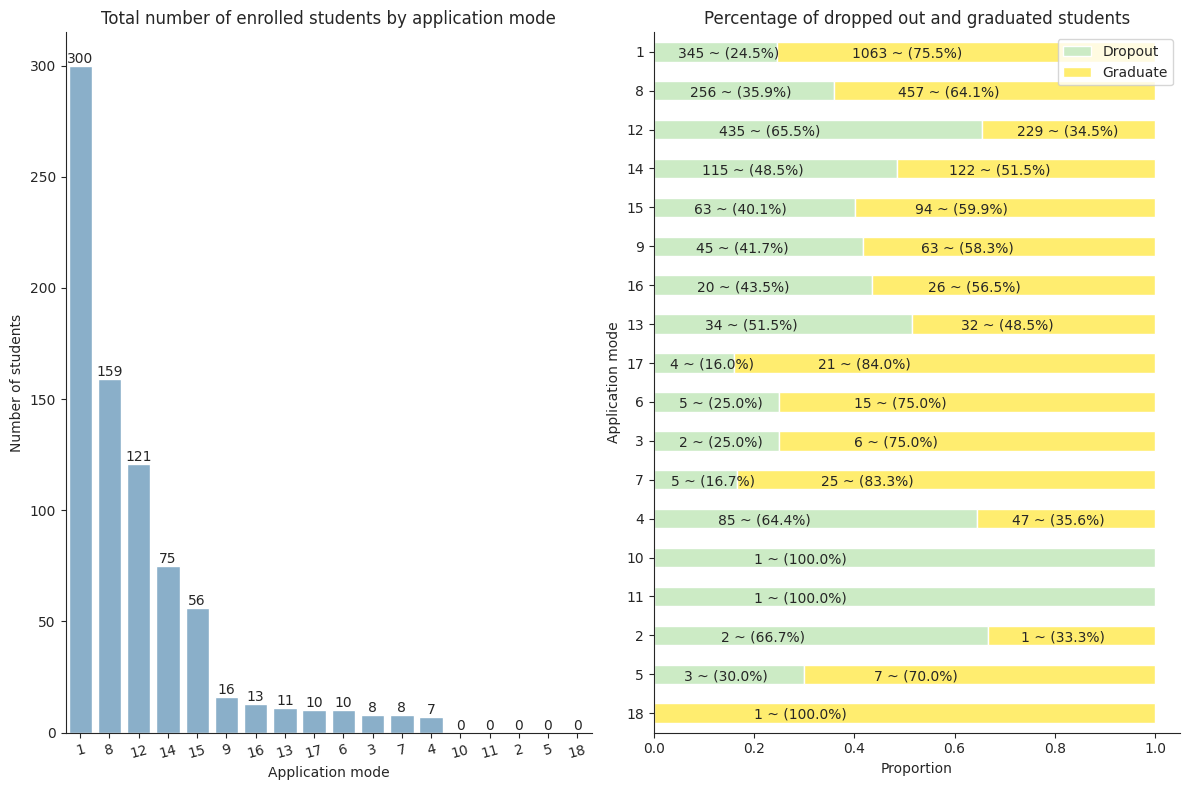

In [71]:
fig = plt.figure(figsize=(12, 8), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create a bar plot.
ax1 = fig.add_subplot(gs[0, 0])
data = df[df['Target'] == 'Enrolled']['Application mode'].value_counts()
order = data.index
ax1 = sns.barplot(data=data.to_frame(), y='count', x=data.index, color=colors[4], order=order)
ax1.set(xlabel='Application mode', ylabel='Number of students')
ax1.bar_label(container=ax1.containers[0], labels=data)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Total number of enrolled students by application mode')
plt.xticks(rotation=15)

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Application mode'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Application mode'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Application mode')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        if proportion:
            plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.15, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

The majority of currently enrolled students has `1st phase - general contingent` (1) application mode and the graduation rate of these students is 75.5%.\
Students with application mode encoded as 8 have 64.1% of graduation rate, whereas students with application mode encoded as 12 have 65.5% drop out rate.

### Application order

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


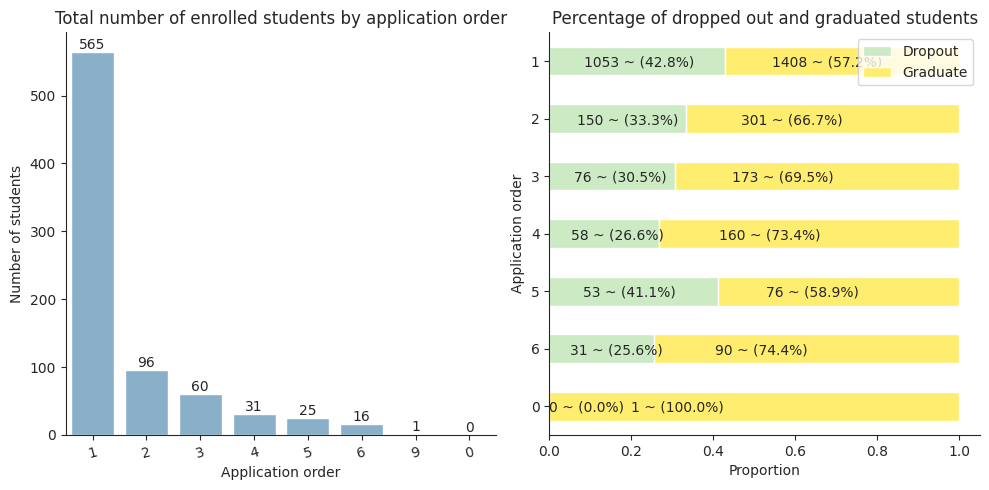

In [72]:
fig = plt.figure(figsize=(10, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create a bar plot.
ax1 = fig.add_subplot(gs[0, 0])
data = df[df['Target'] == 'Enrolled']['Application order'].value_counts()
order = data.index
ax1 = sns.barplot(data=data.to_frame(), y='count', x=data.index, color=colors[4], order=order)
ax1.set(xlabel='Application order', ylabel='Number of students')
ax1.bar_label(container=ax1.containers[0], labels=data)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Total number of enrolled students by application order')
plt.xticks(rotation=15)

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Application order'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Application order'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
labels = [i for i in order if i in data.index]
data_prop.loc[labels[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Application order')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[labels[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

### Daytime/evening attendance

Explore `Daytime/evening` attendance variable, look for patterns, investigate its relation to the target variable and determine whether it is good for prediction or not.

In [73]:
# Replace 0 and 1 values with Female and Male respectively.
df = df.replace({'Daytime/evening attendance': {0: 'Evening', 1: 'Daytime'}})

Create a pie chart that depicts the proportions of total number of daytime, and total number of evening students.\
Create a bar chart that shows the total number of daytime, and total number of evening students.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


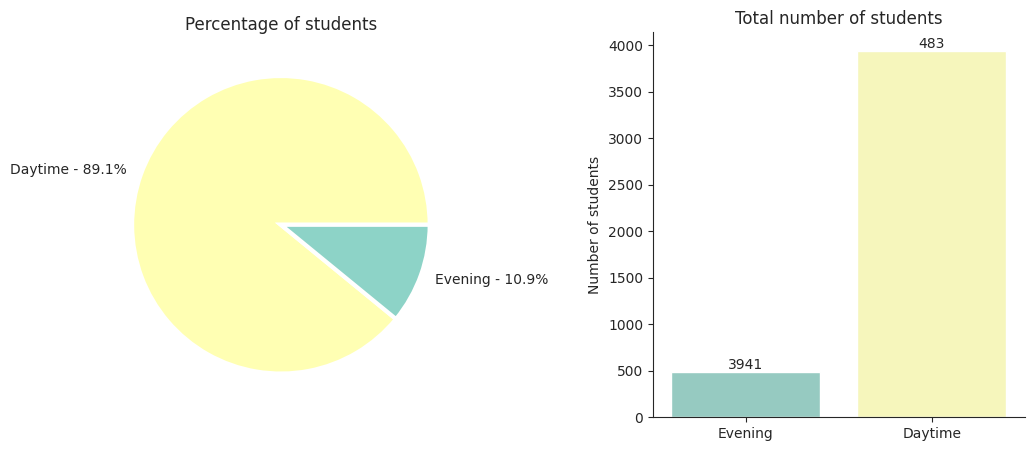

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Daytime/evening attendance'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, colors=[colors_attendance.get(i) for i in data.index], 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax1.set_title('Percentage of students')

# Create a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y='count', x=data.index, palette=colors_attendance)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.bar_label(container=ax2.containers[0], labels=df['Daytime/evening attendance'].value_counts())
ax2.set_title('Total number of students')
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

The vast majority of students studies during the day (89%).

Create a stacked bar chart that shows the total number of dropout, total number of graduated, and total number of enrolled students in daytime attendance and evening attendance groups.\
Create a pie chart that depicts the proportions of total number of dropout and total number of graduated daytime students.\
Create a pie chart that depicts the proportions of total number of dropout and total number of graduated evening students.

/tmp/ipykernel_47/141701434.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(['Daytime/evening attendance',


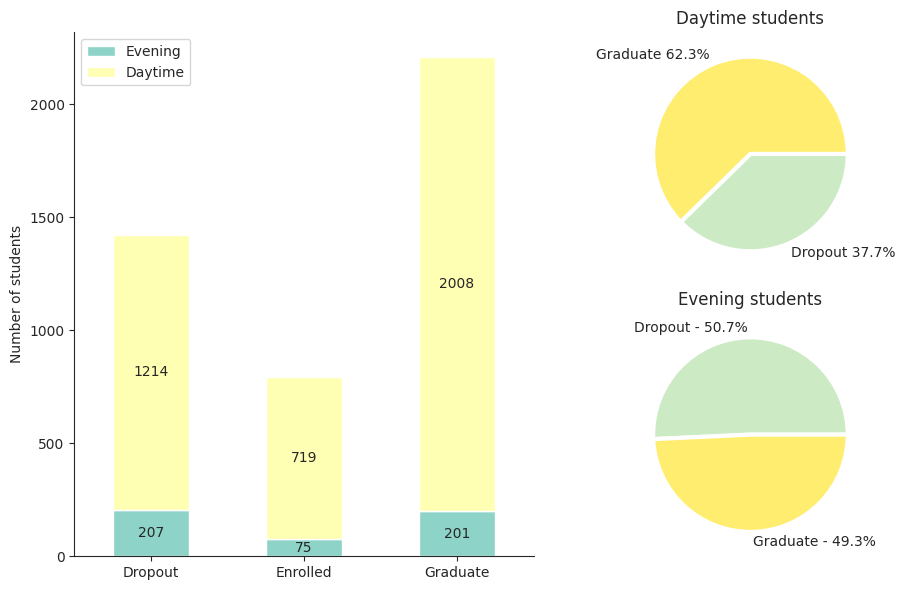

In [75]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)

# Create a stacked barchart.
ax1 = fig.add_subplot(gs[:, 0])
data = df.groupby(['Daytime/evening attendance', 
                   'Target']).size().reset_index().pivot(columns='Daytime/evening attendance', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_attendance.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)
    
# Create a pie chart for daytime students.
daytime = df[(df['Daytime/evening attendance'] == 'Daytime') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} {np.round(daytime[label] / daytime.sum() * 100, 1)}%' for label in daytime.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(daytime, labels=labels, colors=[colors_target.get(i) for i in daytime.index], 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Daytime students')

# Create a pie chart for evening students.
evening = df[(df['Daytime/evening attendance'] == 'Evening') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} - {np.round(evening[label] / evening.sum() * 100, 1)}%' for label in evening.index]
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(evening, labels=labels, colors=[colors_target.get(i) for i in evening.index], 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Evening students')
    
plt.show()

The graduation rate of daytime students is higher than the graduation rate of evening students, it is 62% against 49%. The difference is not significant.\
The variable `Daytime/evening attendance` is imbalanced: the number of daytime students is 719 against only 75 of evening students.
* It is not recommended to use `Daytime/evening attendance` as a predictor variable.

### Course

Explore `Course` variable, look for patterns, investigate its relation to the target variable and determine whether it is good for prediction or not.

In [76]:
# Replace numerical values with their verbal analogs.
df[['Course']] = df[['Course']].replace({'Course': {1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design', 
                                                    3: 'Social Service (evening attendance)', 4: 'Agronomy', 
                                                    5: 'Communication Design', 6: 'Veterinary Design', 
                                                    7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management', 
                                                    10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene', 
                                                    14: 'Advertising and Marketing Management', 
                                                    15: 'Journalism and Communication', 16: 'Basic Education', 
                                                    17: 'Management (evening attendance)'}})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


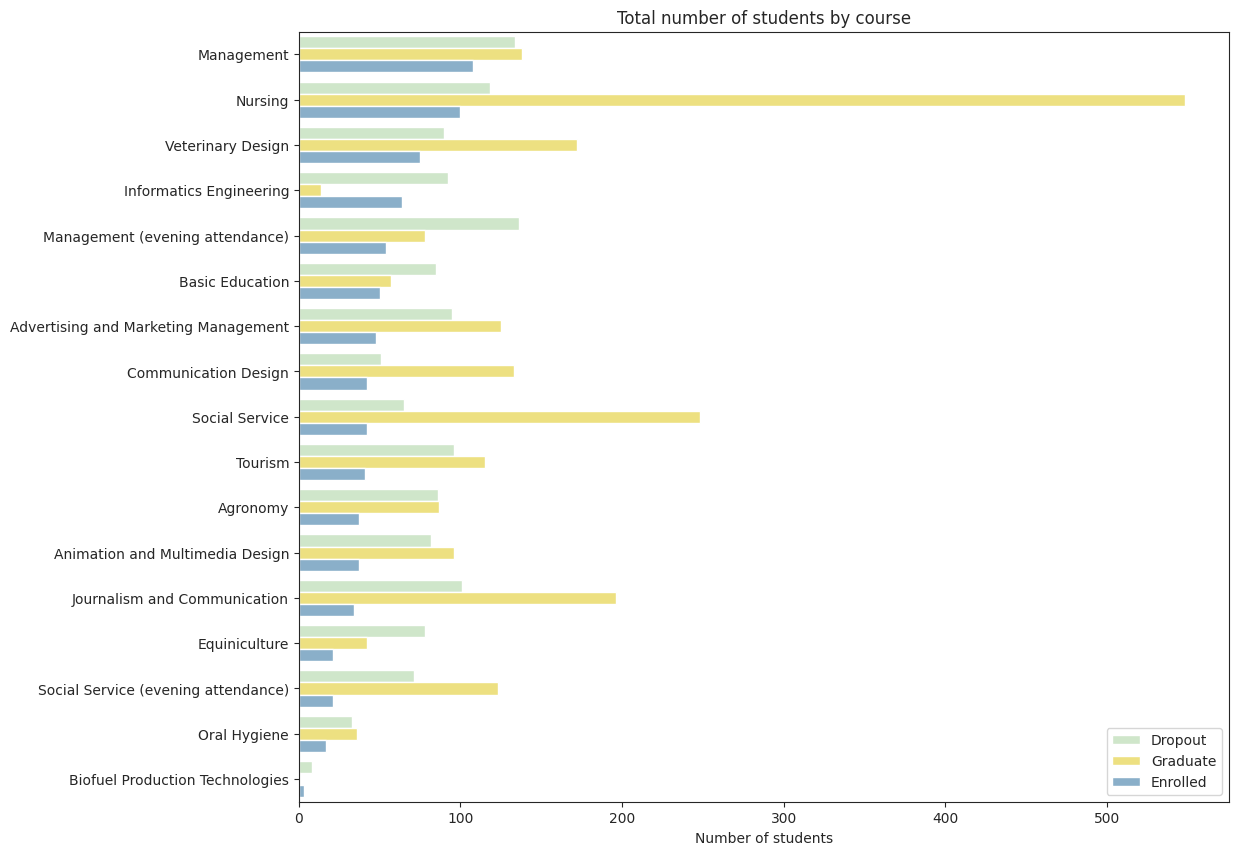

In [77]:
# Create a count plot.
fig, ax = plt.subplots(figsize=(12, 10))
order = df[df['Target'] == 'Enrolled']['Course'].value_counts().index
ax = sns.countplot(data=df, y='Course', hue='Target', palette=colors_target, order=order)
ax.set(xlabel='Number of students', ylabel=None, title='Total number of students by course')
ax.legend_.set_title(None)
plt.show()

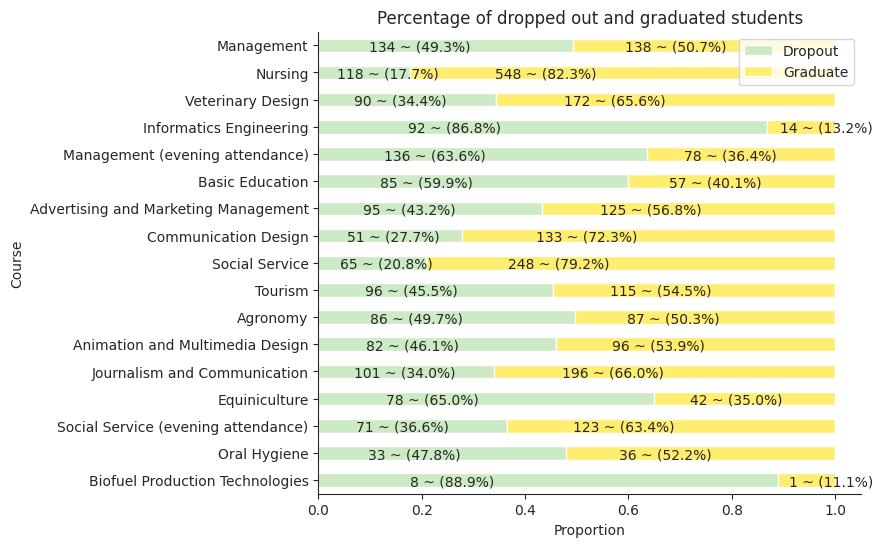

In [78]:
# Create a stacked bar plot.
data = pd.crosstab(index=df['Course'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Course'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
ax = data_prop.loc[order[::-1]].plot(kind='barh', stacked=True, 
                                     color=[colors_target.get(i) for i in data.columns], figsize=(7, 6))
ax.set(xlabel='Proportion', ylabel='Course')
ax.spines[['right', 'top']].set_visible(False)
ax.legend_.set_title(None)
ax.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.2, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

Most currently enrolled students are studying Management, however there is no big difference between numbers of currently enrolled students in different courses.\
The majority of students who successfully graduated were studying Nursing.\
The highest dropout rates are in Informatics Engineering and Biofuel Production Technologies courses with 86.8% and 88.9% respectively.
* In general, there is pattern and the percentage of dropout and graduate students in different courses does not stay the same and we can use the variable `Course` as a predictor for the model.

### Previous qualification

Explore `Previous qualification` variable, look for patterns, investigate its relation to the target variable and determine whether it is good for prediction or not.

From the descriptive statistics we can see that one particular qualification `Secondary education` appears 3,717. This is 84% of the whole dataset. Plot a count chart and see the distribution between qualifications.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


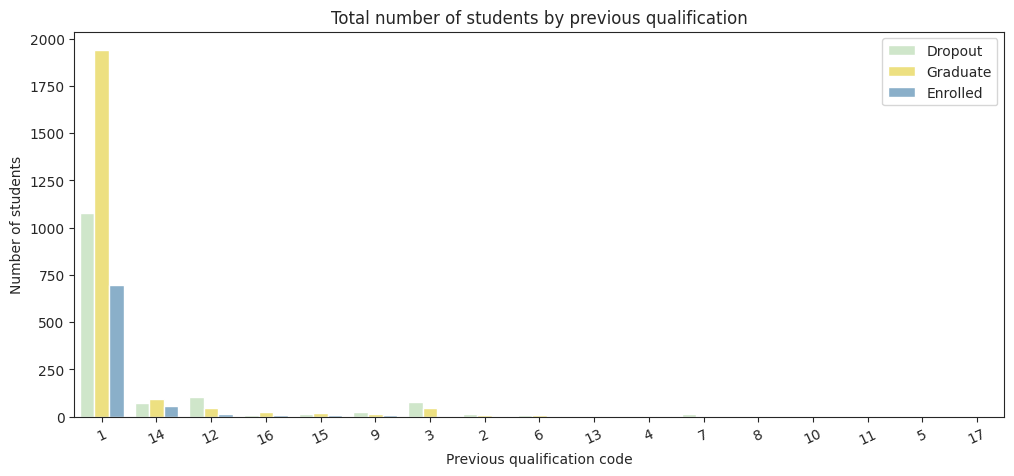

In [79]:
# Create a count plot.
fig, ax = plt.subplots(figsize=(12, 5))
order = df[df['Target'] == 'Enrolled']['Previous qualification'].value_counts()
ax = sns.countplot(data=df, x='Previous qualification', hue='Target', palette=colors_target, order=order.index)
ax.set(xlabel='Previous qualification code', ylabel='Number of students', 
       title='Total number of students by previous qualification')
plt.xticks(rotation=25)
ax.legend_.set_title(None)
plt.show()

The vast majority of students has secondary education (1) as previous qualification. The variable `Previous qualification` is highly imbalanced.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


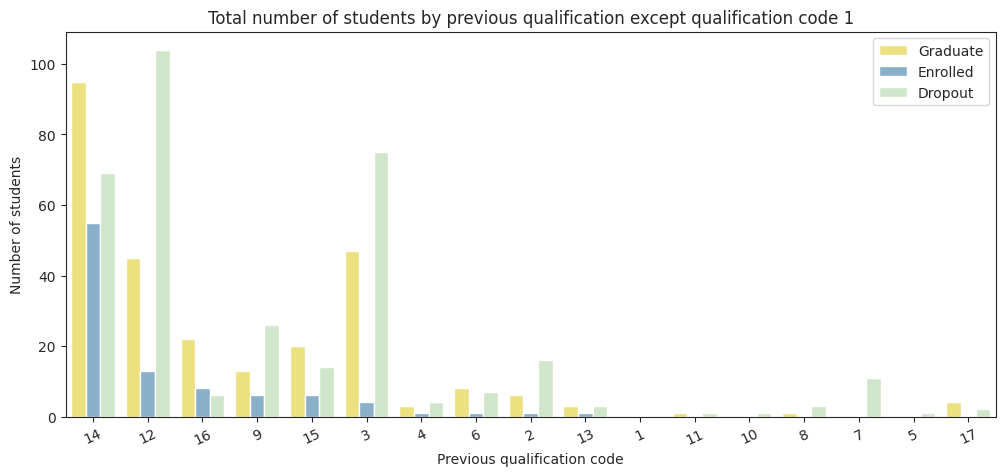

In [80]:
# Create a count plot wothout students with secondary education (1) as previous qualification.
fig, ax = plt.subplots(figsize=(12, 5))
data = df[df['Previous qualification'] != 1]
order = data[data['Target'] == 'Enrolled']['Previous qualification'].value_counts()
ax = sns.countplot(data=data, x='Previous qualification', hue='Target', palette=colors_target, order=order.index)
ax.set(xlabel='Previous qualification code', ylabel='Number of students', 
       title='Total number of students by previous qualification except qualification code 1')
plt.xticks(rotation=25)
ax.legend_.set_title(None)
plt.show()

There is no pattern to be seen in above plots.

### Mother's qualification, Father's qualification

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


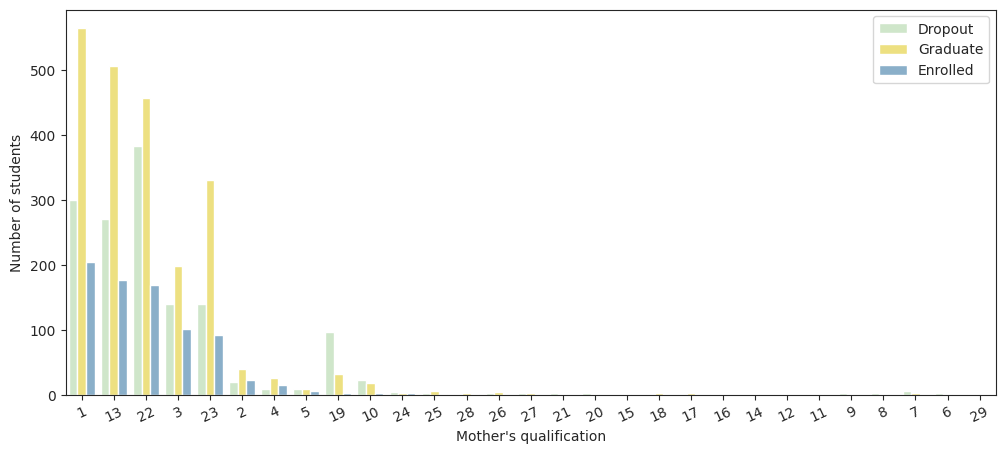

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


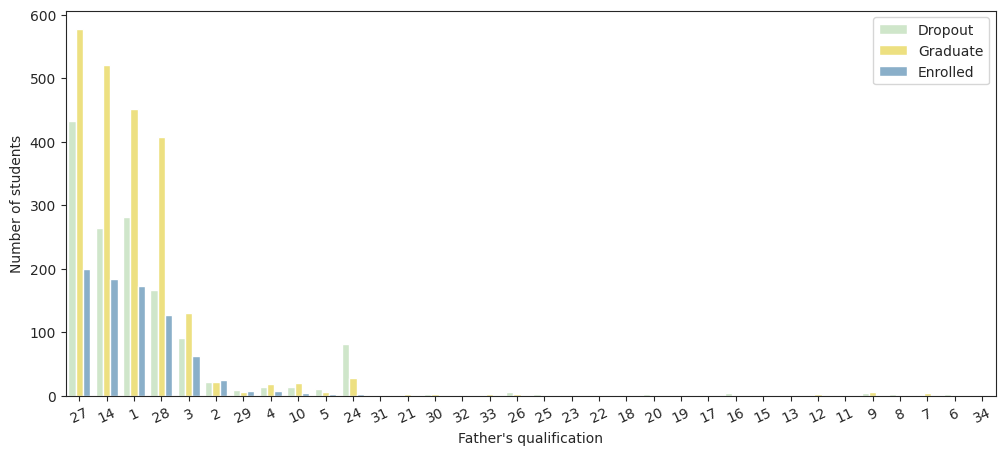

In [81]:
cols = ["Mother's qualification", "Father's qualification"]

# Create count plots.
for col in cols:
    fig, ax = plt.subplots(figsize=(12, 5))
    order = df[df['Target'] == 'Enrolled'][col].value_counts()
    ax = sns.countplot(data=df, x=col, hue='Target', palette=colors_target, order=order.index)
    ax.set(xlabel=col, ylabel='Number of students')
    plt.xticks(rotation=25)
    ax.legend_.set_title(None)
    plt.show()

### Mother's occupation, Father's occupation

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


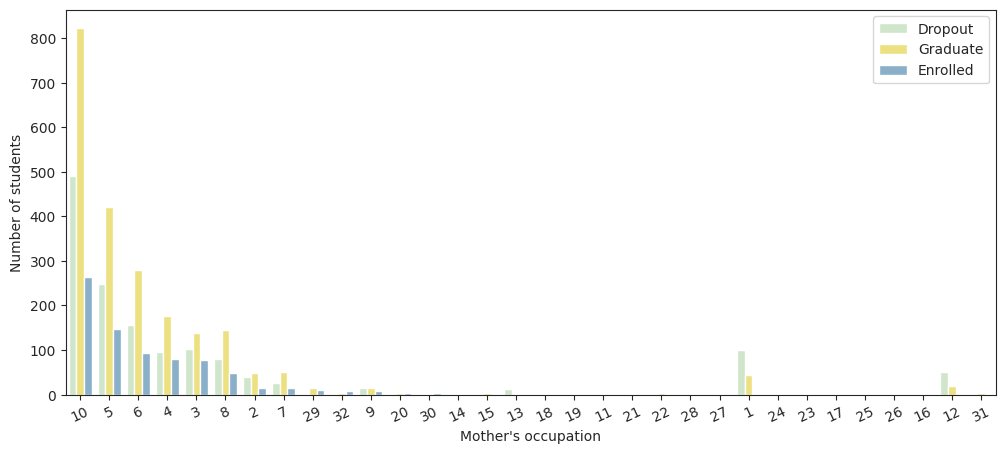

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


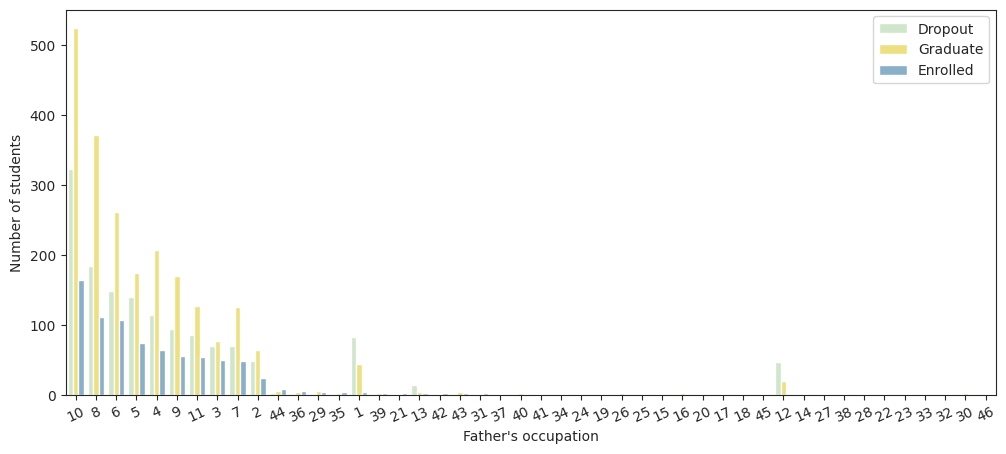

In [82]:
cols = ["Mother's occupation", "Father's occupation"]

# Create count plots.
for col in cols:
    fig, ax = plt.subplots(figsize=(12, 5))
    order = df[df['Target'] == 'Enrolled'][col].value_counts()
    ax = sns.countplot(data=df, x=col, hue='Target', palette=colors_target, order=order.index)
    ax.set(xlabel=col, ylabel='Number of students')
    plt.xticks(rotation=25)
    ax.legend_.set_title(None)
    plt.show()

### Displaced, Educational special needs, Debtor, Tuition fees up to date, Scholarship holder, International

In [83]:
cols = ['Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International']
# Replace 0 and 1 values with No and Yes respectively.
for col in cols:
    df = df.replace({col: {0: 'No', 1: 'Yes'}})

/tmp/ipykernel_47/3360345570.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([col, 'Target']).size().reset_index().pivot(columns=col,


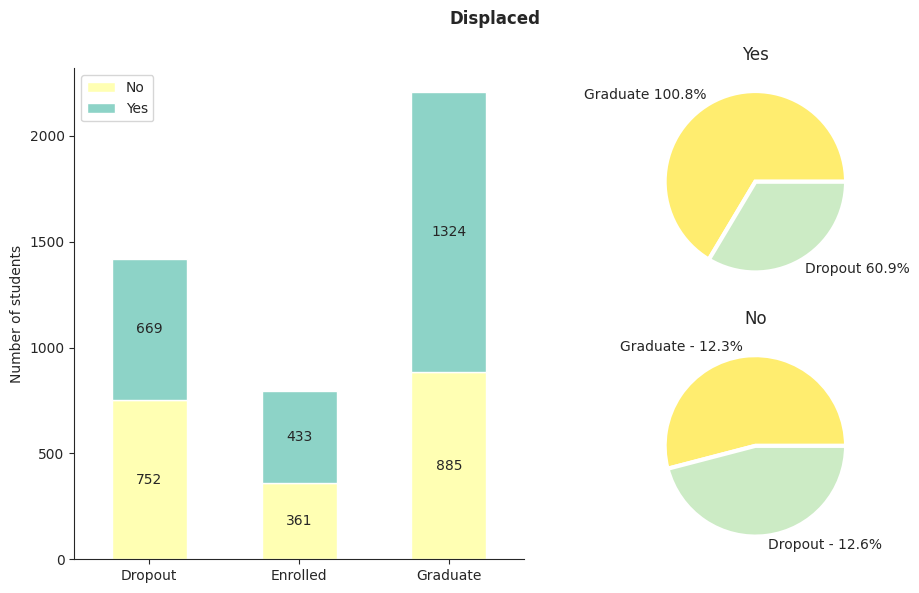

/tmp/ipykernel_47/3360345570.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([col, 'Target']).size().reset_index().pivot(columns=col,


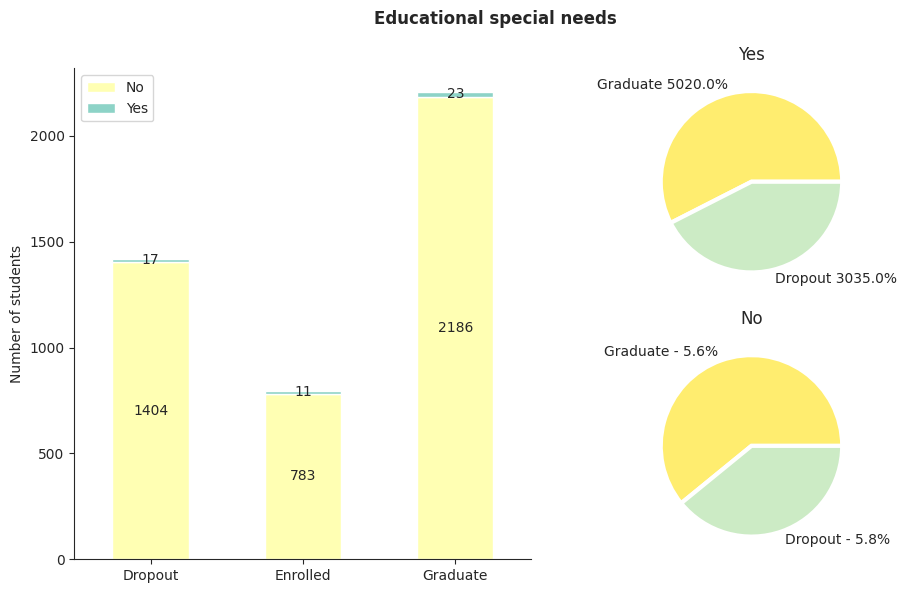

/tmp/ipykernel_47/3360345570.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([col, 'Target']).size().reset_index().pivot(columns=col,


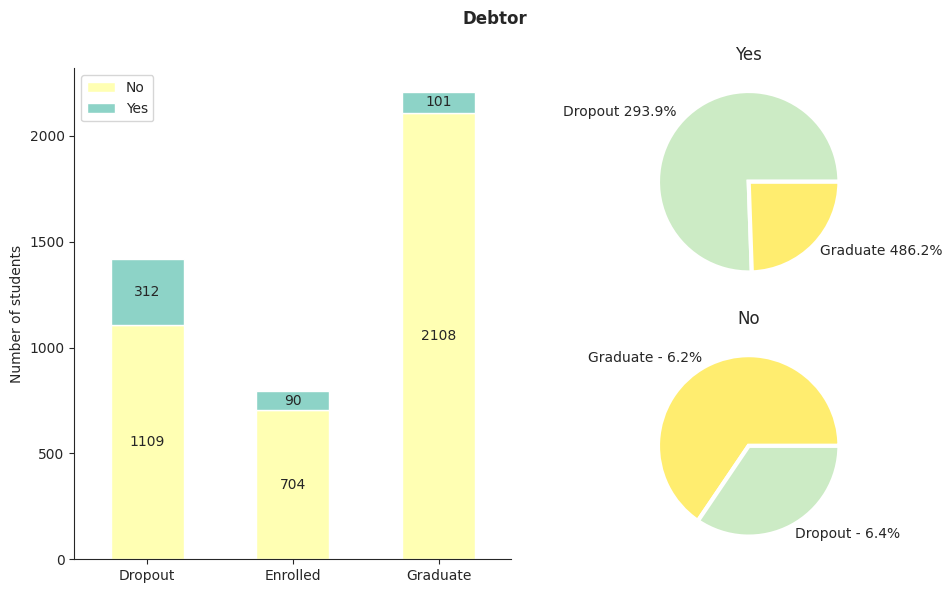

/tmp/ipykernel_47/3360345570.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([col, 'Target']).size().reset_index().pivot(columns=col,


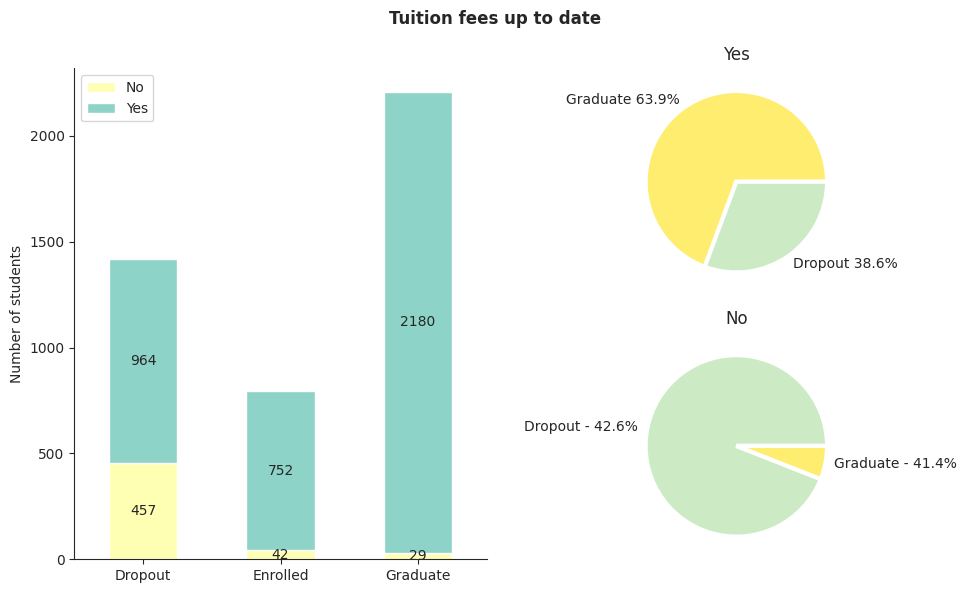

/tmp/ipykernel_47/3360345570.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([col, 'Target']).size().reset_index().pivot(columns=col,


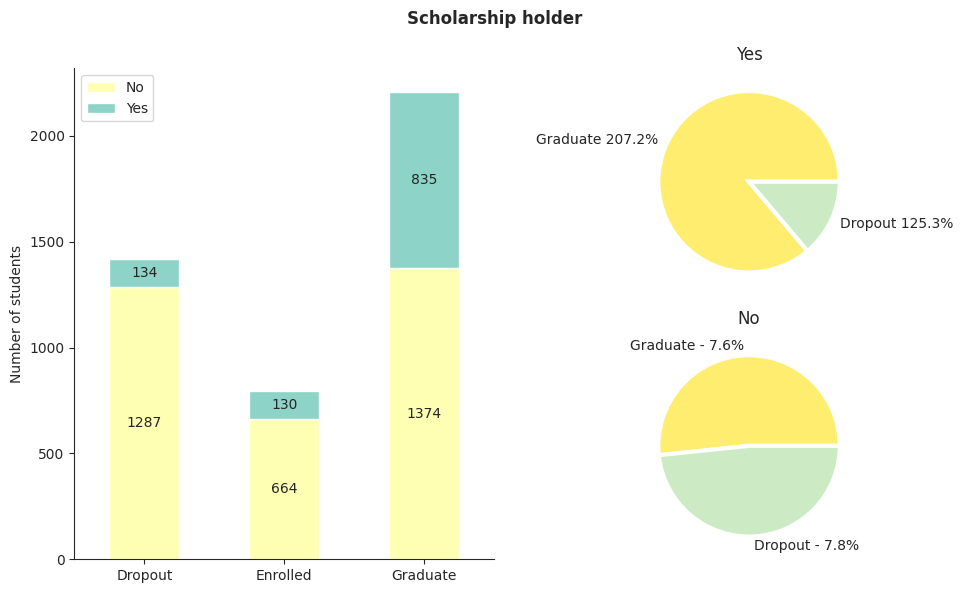

/tmp/ipykernel_47/3360345570.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([col, 'Target']).size().reset_index().pivot(columns=col,


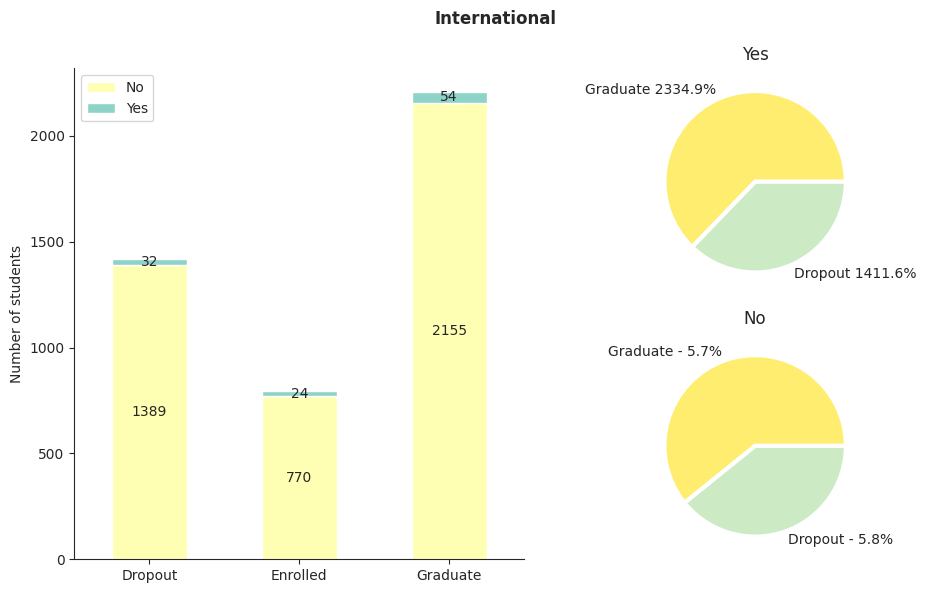

In [84]:
for col in cols:
    fig = plt.figure(figsize=(10, 6), tight_layout=True)
    gs = fig.add_gridspec(nrows=2, ncols=2)

    # Create a stacked barchart.
    ax1 = fig.add_subplot(gs[:, 0])
    data = df.groupby([col, 'Target']).size().reset_index().pivot(columns=col, 
                                                                  index='Target', values=0)
    data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_binary.get(i) for i in data.columns])
    for cont in ax1.containers:
        ax1.bar_label(cont, label_type='center')
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.set(xlabel=None, ylabel='Number of students')
    ax1.legend_.set_title(None)
    plt.xticks(rotation=0)

    # Create a pie chart with parameter Yes.
    yes = df[(df[col] == 'Yes') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
    labels = [f'{label} {np.round(daytime[label] / yes.sum() * 100, 1)}%' for label in yes.index]
    ax2 = fig.add_subplot(gs[0, 1])
    patches, texts = ax2.pie(yes, labels=labels, colors=[colors_target.get(i) for i in yes.index], 
            wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    ax2.set(title='Yes')

    # Create a pie chart with parameter No.
    no = df[(df[col] == 'No') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
    labels = [f'{label} - {np.round(evening[label] / no.sum() * 100, 1)}%' for label in no.index]
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.pie(no, labels=labels, colors=[colors_target.get(i) for i in no.index], 
            wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    ax3.set(title='No')
    
    fig.suptitle(col, weight='bold')
    
    plt.show()

### Continuous variables

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

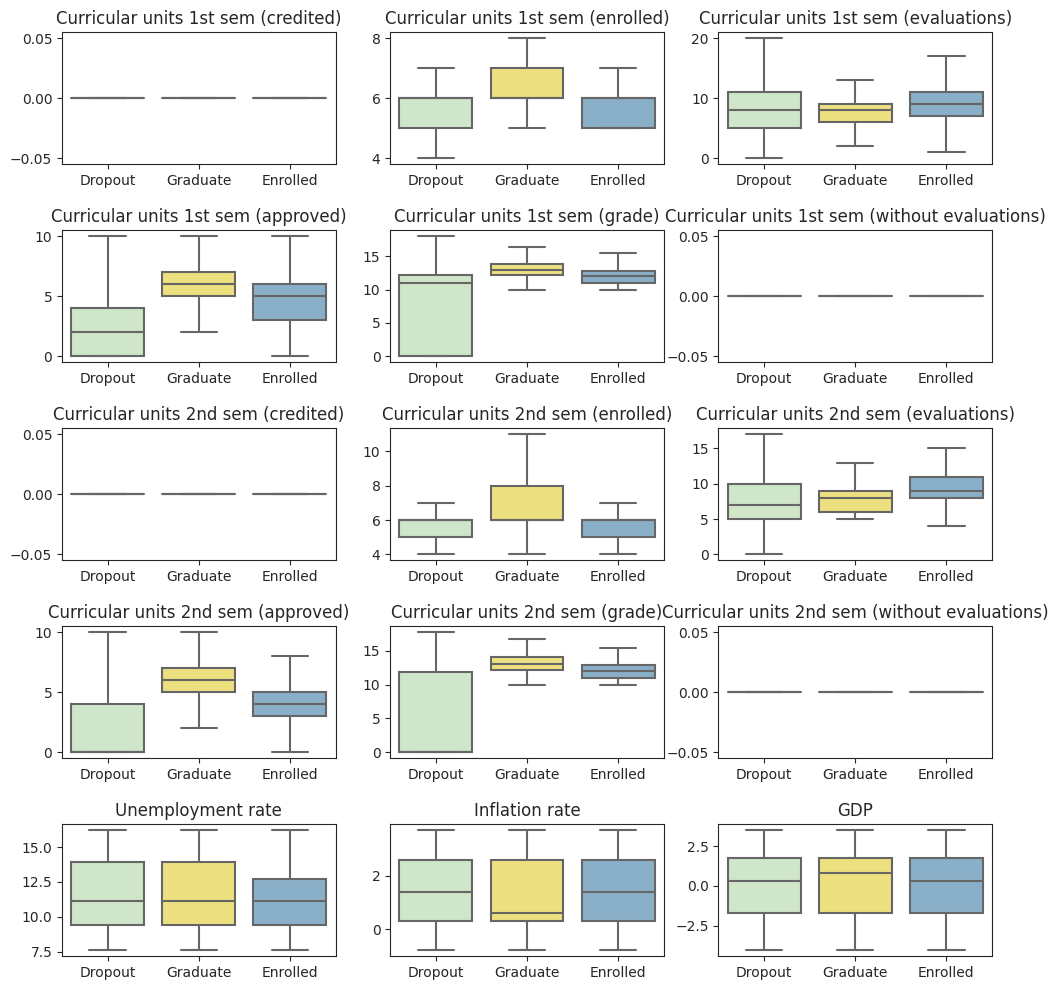

In [85]:
fig, axs = plt.subplots(5, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
cols = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

index = 0

for i in range(5):
    for j in range(3):
        sns.boxplot(df, x='Target', y=cols[index], showfliers=False, palette=colors_target, ax=axs[i, j])
        axs[i, j].set(xlabel=None, ylabel=None, title=cols[index])
        index += 1

## Feature engineering

In this section we will select important features, perform necessary changes to them and make the dataset ready for model building.

In [86]:
# Copy the original dataset.
df = students.copy()

Create an association matrix using `dython` library.

/opt/conda/lib/python3.10/site-packages/dython/nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/opt/conda/lib/python3.10/site-packages/dython/nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


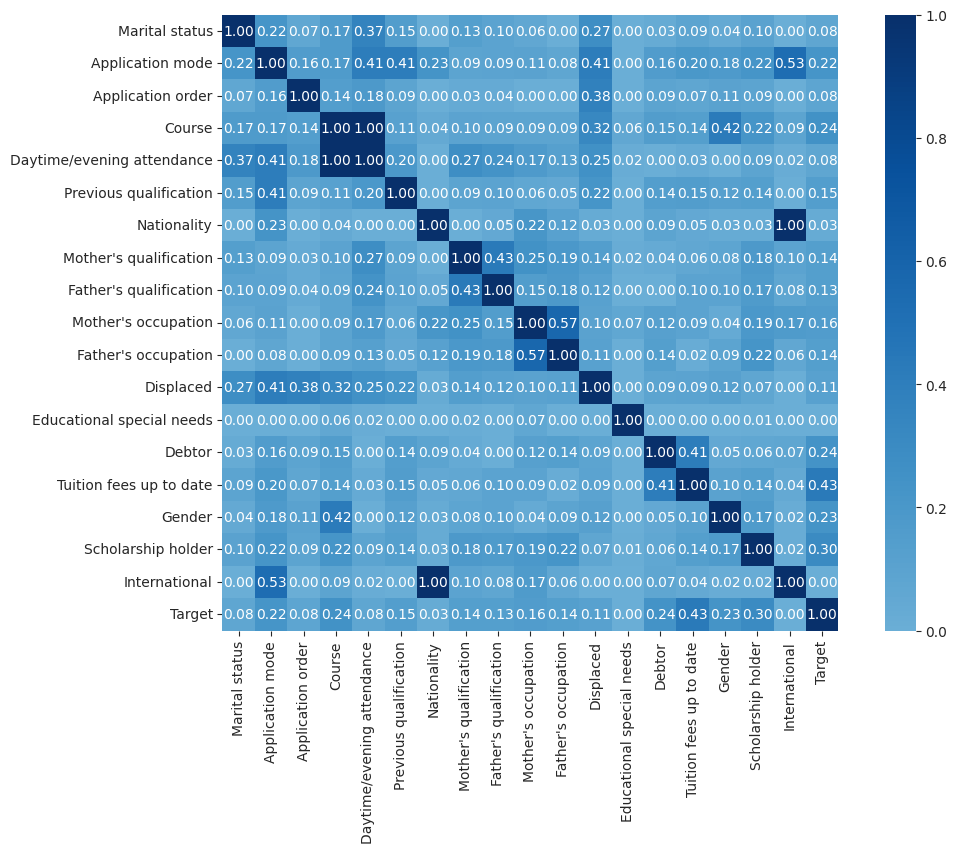

In [87]:
cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 
        'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification", 
        "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 
        'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']

fig, ax = plt.subplots(figsize = (12, 8))

# Estimate and generate Cramer's V association plot.
cramers_v = associations(df[cols], nom_nom_assoc='cramer', ax=ax, cmap='Blues')

We see that some features have solid association with each other, these features are redundant and will not provide the model new information.\
Mother's occupation and Father's occupation have good association with each other (0.57). Keep only Mother's occupation as it has higher association with the Target.\
Mother's qualification and Father's qualification have good association with each other (0.43). Keep only Mother's qualification as it has higher association with the Target.\
Debtor and Tuition fees up to date have good association with each other (0.41). Keep only Tuition fees up to date as it has higher association with the Target.\
Displaced and Application mode have good association with each other (0.41). Keep only Application mode as it has higher association with the Target.
* According to the association matrix we will select following categorical features: `Application mode`, `Course`, `Previous qualification`, `Mother's qualification`, `Tuition fees up to date`, `Mother's occupation`, `Gender`, `Scholarship holder`.

/opt/conda/lib/python3.10/site-packages/dython/nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/opt/conda/lib/python3.10/site-packages/dython/nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


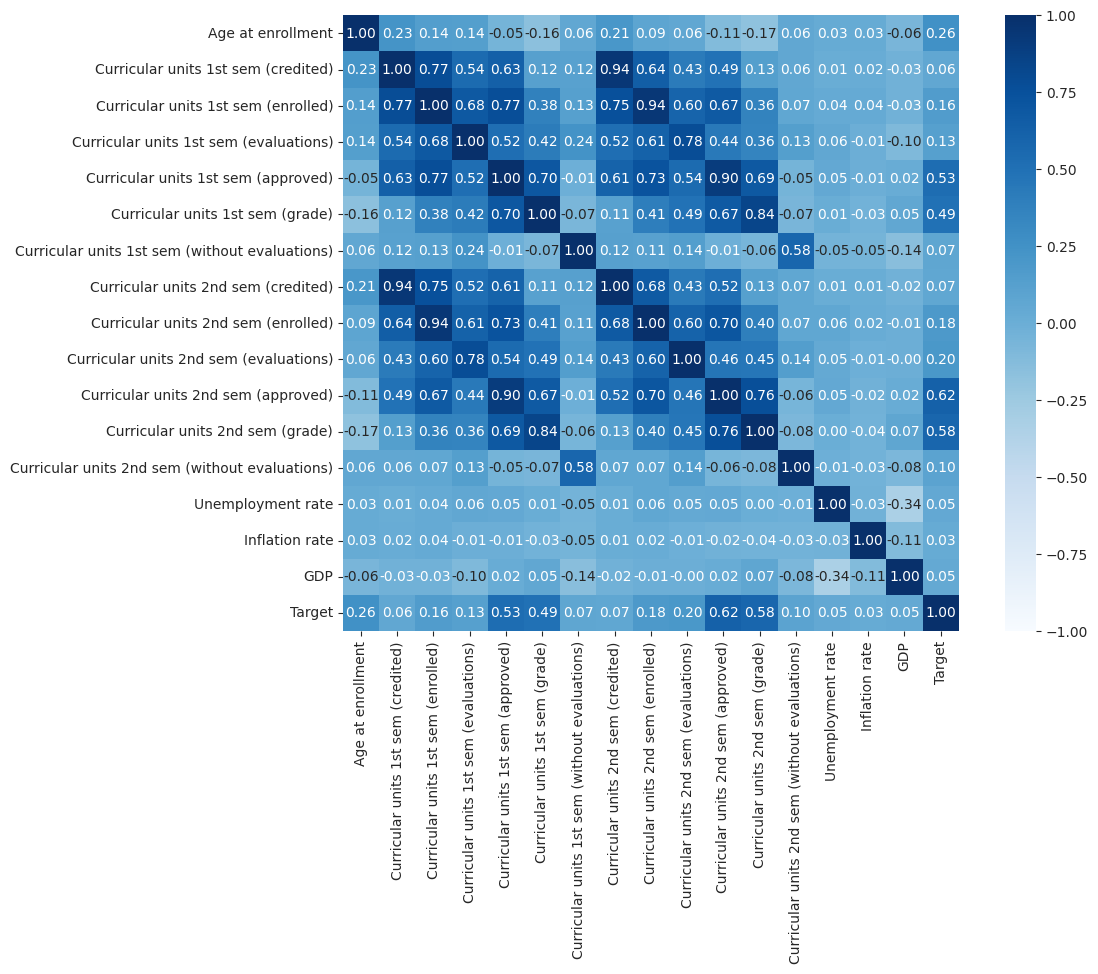

In [88]:
cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
           'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

fig, ax = plt.subplots(figsize = (12, 8))

# Estimate and generate coorelation ratio association plot.
cor_ratio = associations(df[cols], nom_num_assoc='correlation_ratio', num_num_assoc='pearson', ax=ax, cmap='Blues')

/opt/conda/lib/python3.10/site-packages/dython/nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/opt/conda/lib/python3.10/site-packages/dython/nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


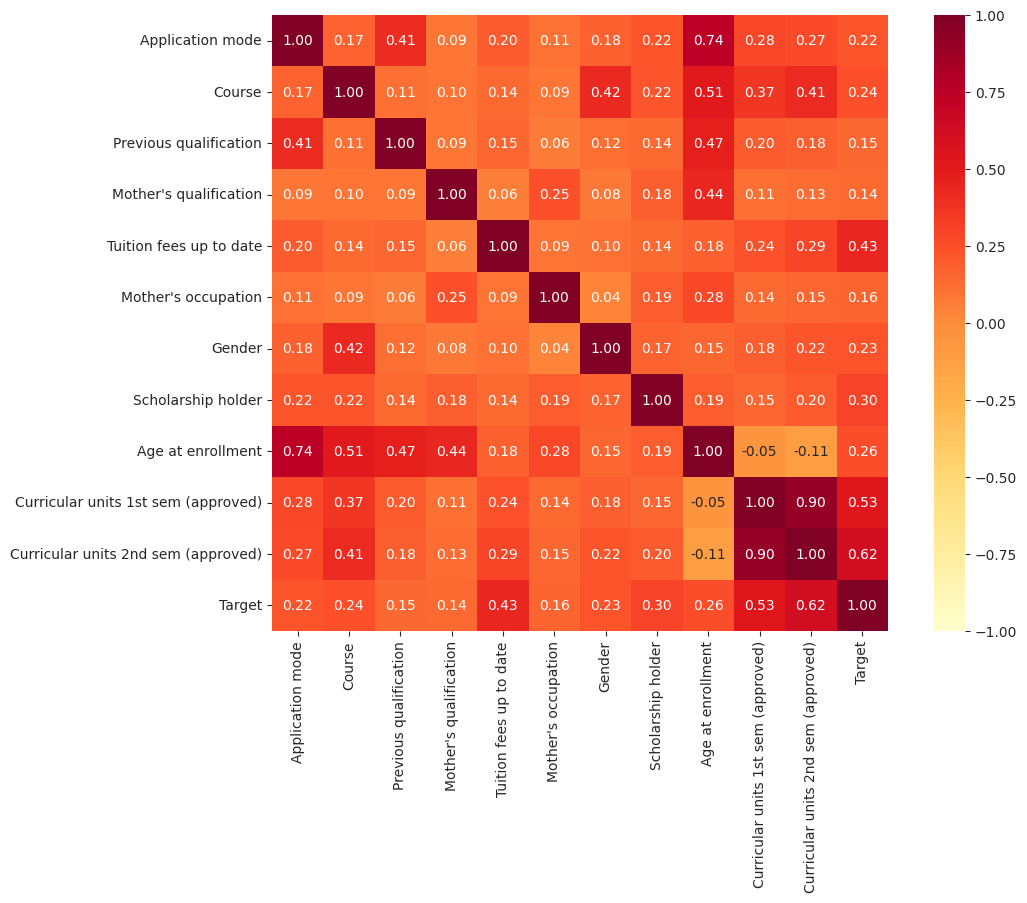

In [89]:
cols = ['Application mode', 'Course', 'Previous qualification', "Mother's qualification", 'Tuition fees up to date', 
        "Mother's occupation", 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 
        'Curricular units 2nd sem (approved)', 'Target']
fig, ax = plt.subplots(figsize = (12, 8))

# Estimate and generate coorelation ratio association plot.
cor_ratio = associations(df[cols], nom_num_assoc='correlation_ratio', num_num_assoc='pearson', ax=ax, cmap='YlOrRd')

* According to the association matrix we will select following categorical features: `Age at enrollment`, `Curricular units 1st sem (approved)`, `Curricular units 2nd sem (approved)`.

In [90]:
cols = ['Application mode', 'Course', 'Previous qualification', "Mother's qualification", 'Tuition fees up to date', 
        "Mother's occupation", 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 
        'Curricular units 2nd sem (approved)', 'Target']

# Keep only relevant columns.
df = df[cols]

# Remove enrolled students.
df = df[df['Target'] != 'Enrolled']

# Convert into numerical data type.
df = df.replace({'Target': {'Dropout': 0, 'Graduate': 1}})
cols = ['Tuition fees up to date', 'Gender', 'Scholarship holder', 'Target']
df[cols] = df[cols].astype('int32')

# Perform one-hot encoding.
df = pd.get_dummies(df, drop_first=True)

The dataset is ready for model building.

## Model building

In [210]:
results = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [211]:
# Predicting variable.
y = df['Target']

# Predictor features.
X = df.copy()
X = X.drop('Target', axis = 1)

# Create training and test sets, 75% and 25% respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [212]:
def conf_matrix_plot(model, x_data, y_data):

    model_pred = model.predict(x_data)
    cm = metrics.confusion_matrix(y_data, model_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'], )  
    disp.plot(values_format='')
    plt.show()

In [213]:
def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    auc = metrics.roc_auc_score(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.95, 0.05, 'AUC = %0.3f' % auc, ha='right', weight='bold')

In [214]:
def print_results(algo, y_test, y_preds):
    
    global results
    print(algo)
    print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_preds))
    print("Precision:", "%.3f" % metrics.precision_score(y_test, y_preds))
    print("Recall:", "%.3f" % metrics.recall_score(y_test, y_preds))
    print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_preds))
    # Write results into a dataframe.
    row = {'Algorithm': algo, 'Accuracy': metrics.accuracy_score(y_test, y_preds), 
           'Precision': metrics.precision_score(y_test, y_preds), 'Recall': metrics.recall_score(y_test, y_preds), 
           'F1 Score': metrics.f1_score(y_test, y_preds)}
    results = pd.concat([results, pd.DataFrame(row, index=[0])], ignore_index=True)
    results = results.reset_index(drop=True)

### Naive Bayes

In [215]:
# Normalize data.
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
# Fit the model.
gnb = GaussianNB()
gnb.fit(X_scaled_train, y_train)
# Get the predictions on test data.
y_preds = gnb.predict(X_scaled_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [216]:
print_results('Naive Bayes', y_test, y_preds)

Naive Bayes
Accuracy: 0.595
Precision: 0.595
Recall: 0.991
F1 Score: 0.744


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

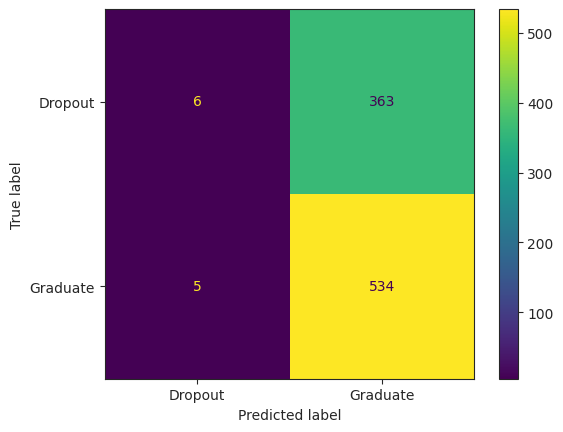

In [217]:
conf_matrix_plot(gnb, X_scaled_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

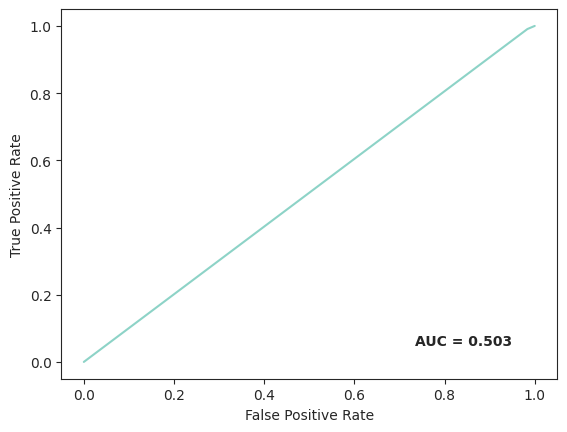

In [218]:
y_preds_prob_gnb = gnb.predict_proba(X_scaled_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_gnb)

### Logistic regression

In [219]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_scaled_train, y_train)
y_preds = lr.predict(X_scaled_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [220]:
print_results('Logistic regression', y_test, y_preds)

Logistic regression
Accuracy: 0.887
Precision: 0.873
Recall: 0.946
F1 Score: 0.908


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

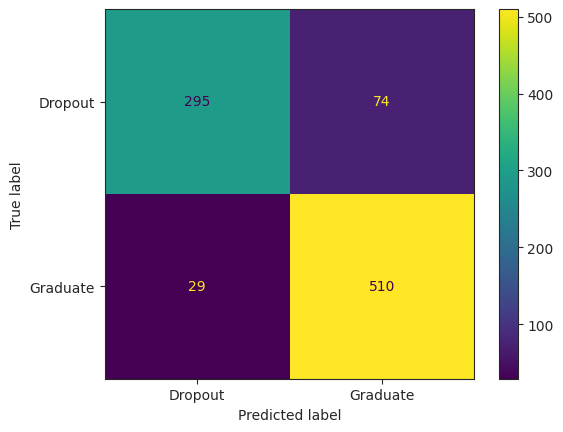

In [221]:
conf_matrix_plot(lr, X_scaled_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

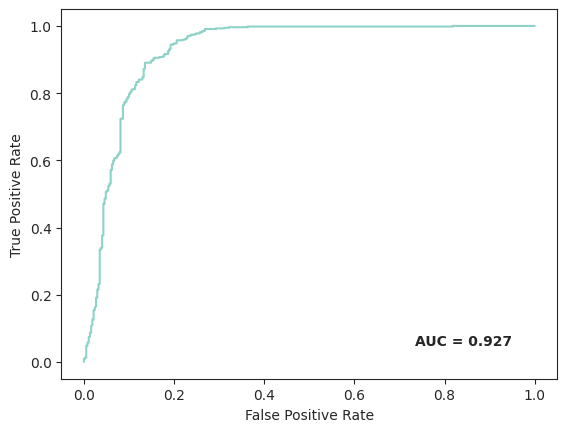

In [222]:
y_preds_prob_lr = lr.predict_proba(X_scaled_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_lr)

### SVM

In [223]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
svm = SVC(probability=True)
svm.fit(X_scaled_train, y_train)
y_preds = svm.predict(X_scaled_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [224]:
print_results('SVM', y_test, y_preds)

SVM
Accuracy: 0.868
Precision: 0.844
Recall: 0.954
F1 Score: 0.895


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

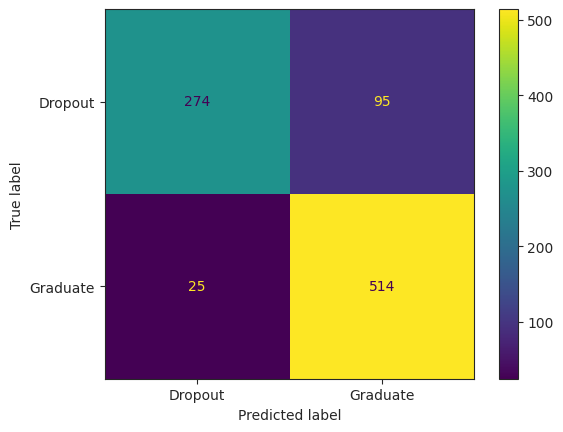

In [225]:
conf_matrix_plot(svm, X_scaled_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

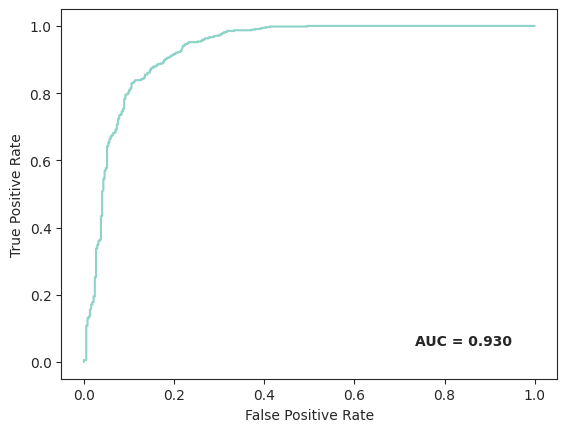

In [226]:
y_preds_prob_svm = svm.predict_proba(X_scaled_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_svm)

### Decision Tree

In [227]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_preds = decision_tree.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

In [228]:
print_results('Decision Tree', y_test, y_preds)

Decision Tree
Accuracy: 0.846
Precision: 0.874
Recall: 0.865
F1 Score: 0.869


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

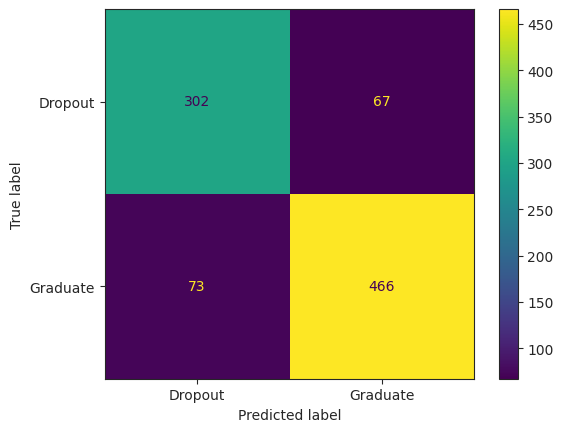

In [229]:
conf_matrix_plot(decision_tree, X_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

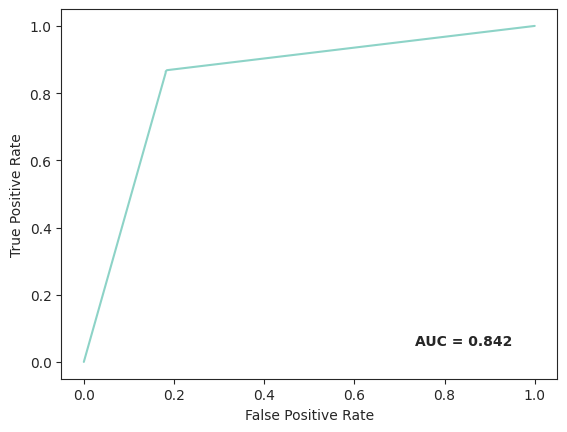

In [230]:
y_preds_prob_dt = decision_tree.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_dt)

### Random forest

In [231]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

In [232]:
print_results('Random forest', y_test, y_preds)

Random forest
Accuracy: 0.904
Precision: 0.891
Recall: 0.955
F1 Score: 0.922


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

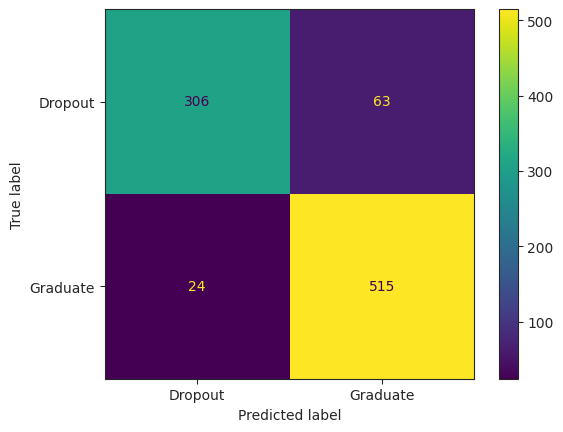

In [233]:
conf_matrix_plot(rf, X_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

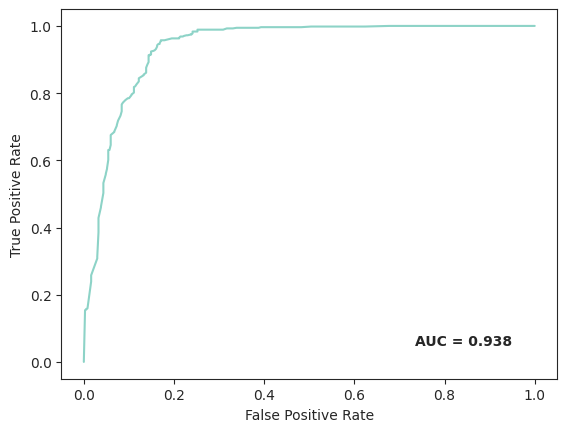

In [234]:
y_preds_prob_rf = rf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_rf)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Visualizing Feature Importances')

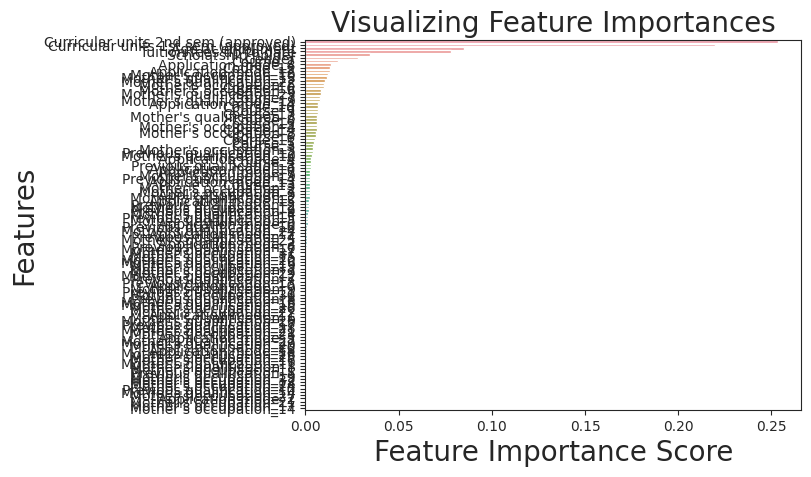

In [235]:
feature_imp = pd.Series(rf.feature_importances_, 
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.title("Visualizing Feature Importances", fontsize=20)

### XGBoost

In [236]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)

In [237]:
print_results('XGBoost', y_test, y_preds)

XGBoost
Accuracy: 0.895
Precision: 0.884
Recall: 0.948
F1 Score: 0.915


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

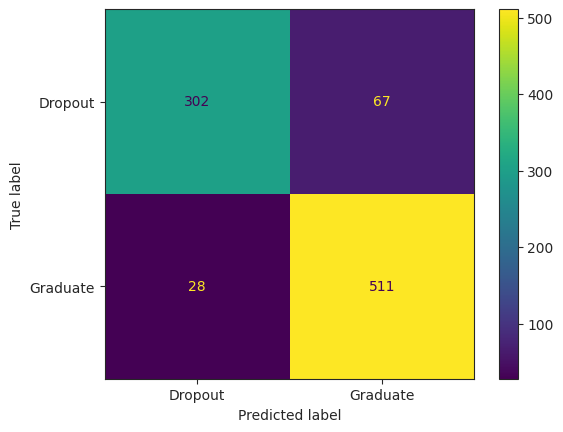

In [238]:
conf_matrix_plot(xgb, X_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

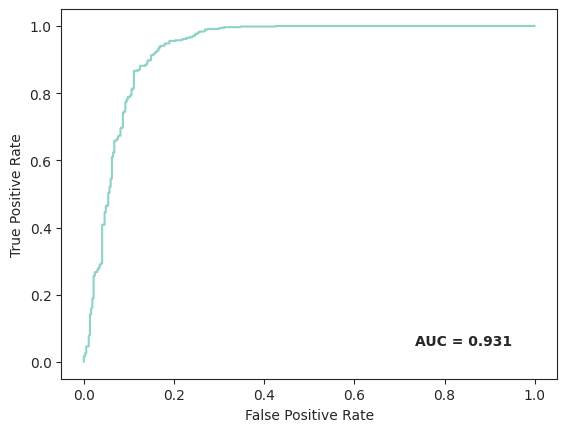

In [239]:
y_preds_prob_xgb = xgb.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_xgb)

In [240]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train,y_train)
y_preds = ada.predict(X_test)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

In [241]:
print_results('AdaBoost', y_test, y_preds)

AdaBoost
Accuracy: 0.891
Precision: 0.879
Recall: 0.946
F1 Score: 0.912


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

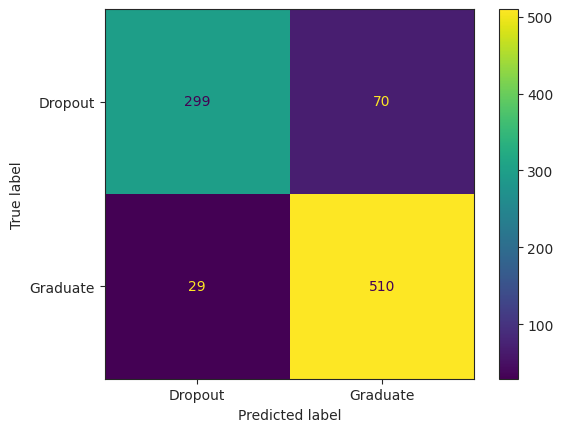

In [242]:
conf_matrix_plot(ada, X_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

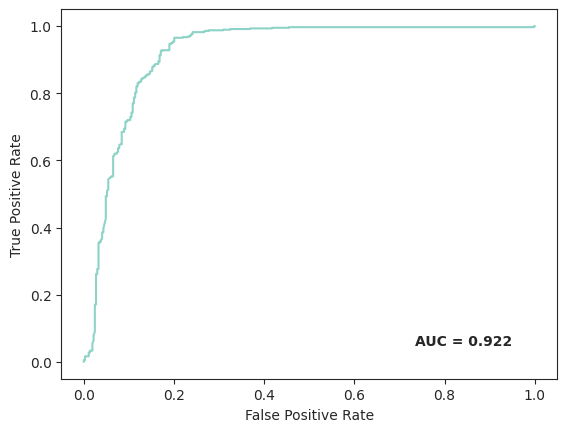

In [243]:
y_preds_prob_ada = ada.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_ada)

**ann**

In [244]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential,initializers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [245]:
model = Sequential()

model.add(Dense(256,activation='relu',input_dim=114,kernel_initializer='he_normal'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(18,activation='relu'))

model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [246]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 256)               29440     
                                                                 
 dense_65 (Dense)            (None, 128)               32896     
                                                                 
 dense_66 (Dense)            (None, 64)                8256      
                                                                 
 dense_67 (Dense)            (None, 28)                1820      
                                                                 
 dense_68 (Dense)            (None, 28)                812       
                                                                 
 dense_69 (Dense)            (None, 18)                522       
                                                                 
 dense_70 (Dense)            (None, 8)                

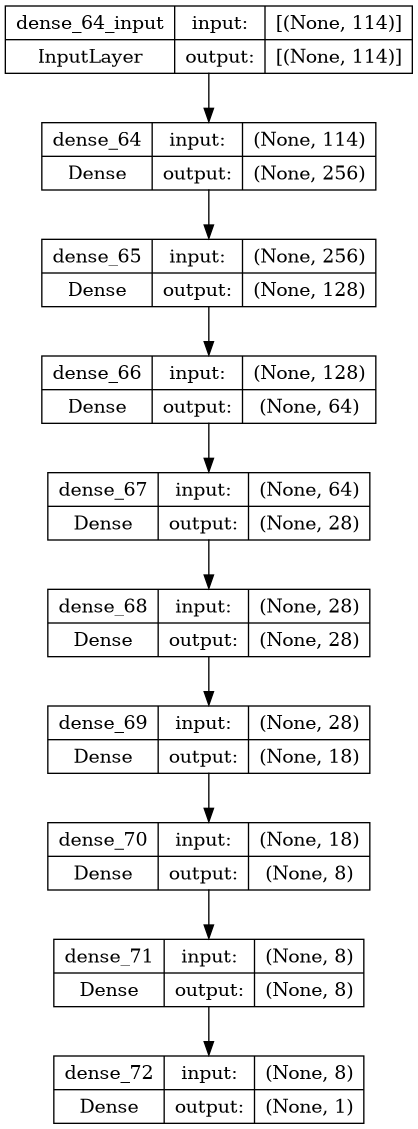

In [247]:
tensorflow.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
 
   
)

In [248]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [249]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [250]:
history = model.fit(X_scaled_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
69/69 [==============================] - 4s 9ms/step - loss: 0.5216 - accuracy: 0.8034 - val_loss: 0.3311 - val_accuracy: 0.8917
Epoch 2/100
69/69 [==============================] - 0s 7ms/step - loss: 0.3146 - accuracy: 0.8893 - val_loss: 0.2805 - val_accuracy: 0.8899
Epoch 3/100
69/69 [==============================] - 0s 6ms/step - loss: 0.2624 - accuracy: 0.9017 - val_loss: 0.3458 - val_accuracy: 0.8826
Epoch 4/100
69/69 [==============================] - 0s 7ms/step - loss: 0.2616 - accuracy: 0.8957 - val_loss: 0.2818 - val_accuracy: 0.8917
Epoch 5/100
69/69 [==============================] - 0s 7ms/step - loss: 0.2167 - accuracy: 0.9187 - val_loss: 0.3137 - val_accuracy: 0.8771
Epoch 6/100
69/69 [==============================] - 0s 6ms/step - loss: 0.2084 - accuracy: 0.9178 - val_loss: 0.3085 - val_accuracy: 0.8899
Epoch 7/100
69/69 [==============================] - 0s 6ms/step - loss: 0.1807 - accuracy: 0.9297 - val_loss: 0.3658 - val_accuracy: 0.8881
Epoch 8/100
6

In [251]:
y_preds = model.predict(X_scaled_test)

29/29 [==============================] - 0s 2ms/step


In [252]:
y_preds = (y_preds>0.40)

In [253]:
print_results('ANN', y_test, y_preds)

ANN
Accuracy: 0.860
Precision: 0.855
Recall: 0.920
F1 Score: 0.887


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

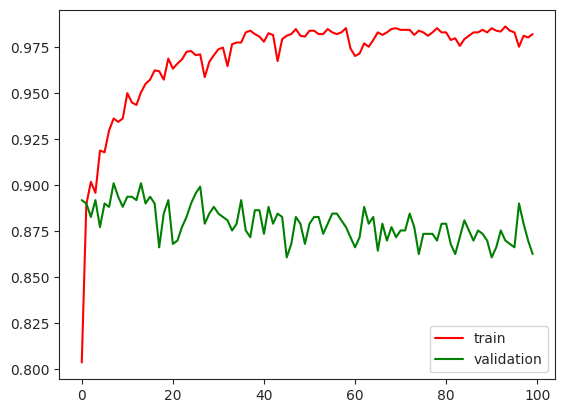

In [254]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

29/29 [==============================] - 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

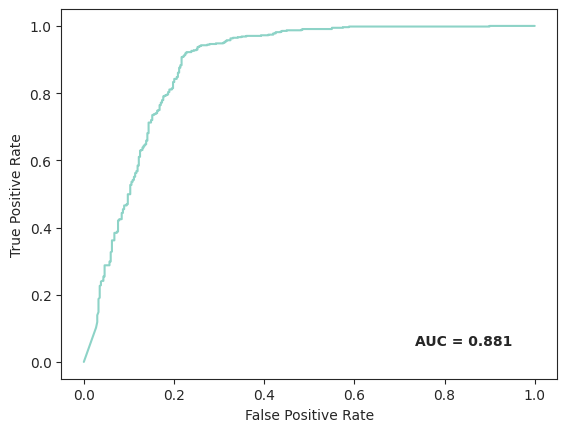

In [255]:
y_preds_prob_ann = model.predict(X_scaled_test)[:,0] 
plot_roc_curve(y_test,y_preds_prob_ann)

## Model evaluation

In [256]:
# Compare models.
results.sort_values(by=['Accuracy'], ascending=False)

Algorithm  Accuracy  Precision    Recall  F1 Score
4        Random forest  0.904185   0.891003  0.955473  0.922113
5              XGBoost  0.895374   0.884083  0.948052  0.914951
6             AdaBoost  0.890969   0.879310  0.946197  0.911528
1  Logistic regression  0.886564   0.873288  0.946197  0.908281
2                  SVM  0.867841   0.844007  0.953618  0.895470
7                  ANN  0.860132   0.855172  0.920223  0.886506
3        Decision Tree  0.845815   0.874296  0.864564  0.869403
0          Naive Bayes  0.594714   0.595318  0.990724  0.743733

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

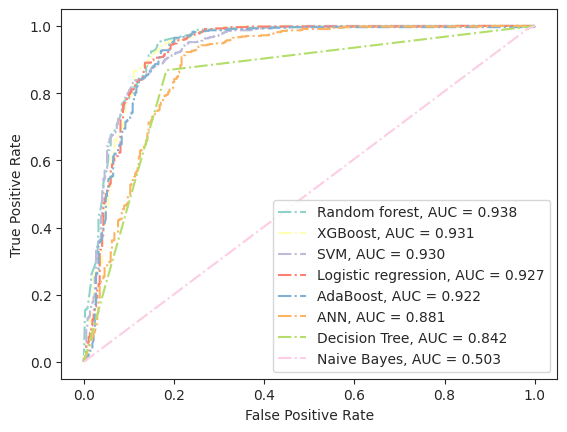

In [257]:
y_preds_probs = {'Naive Bayes': y_preds_prob_gnb, 'Logistic regression': y_preds_prob_lr, 'SVM': y_preds_prob_svm, 
                 'Decision Tree': y_preds_prob_dt, 'Random forest': y_preds_prob_rf, 'XGBoost': y_preds_prob_xgb,'AdaBoost': y_preds_prob_ada,'ANN': y_preds_prob_ann}

aucs = {}
for i in y_preds_probs.keys():
    aucs[i] = metrics.roc_auc_score(y_test, y_preds_probs[i])
    
for i in dict(sorted(aucs.items(), key=operator.itemgetter(1), reverse=True)).keys():
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds_probs[i])
    auc = aucs[i]
    plt.plot(fpr, tpr, linestyle='dashdot', label=f'{i}, AUC = {auc:.3f}')
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

## Hyperparameter tuning

In [ ]:
# Determine set of hyperparameters.
cv_params = {'n_estimators' : [25, 50, 75, 100], 
              'max_depth' : [10, 30, 50, 70],        
              'min_samples_leaf' : [0.5, 0.75, 1], 
              'min_samples_split' : [0.001, 0.005, 0.01],
              'max_features' : ['sqrt'], 
              'max_samples' : [.3, .5, .7, .9]}

# Instantiate model.
rf = RandomForestClassifier(random_state=0)

# Search over specified parameters.
rf_val = GridSearchCV(rf, cv_params, cv=3, refit='accuracy', n_jobs = -1, verbose = 1)

# Fit the model.
rf_val.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [ ]:
# Obtain optimal parameters.
rf_val.best_params_

In [ ]:
# Determine new set of hyperparameters.
cv_params = {'n_estimators' : [40, 45, 50, 55], 
              'max_depth' : [20, 25, 30, 35],        
              'min_samples_leaf' : [0.8, 0.9, 1], 
              'min_samples_split' : [0.0005, 0.001, 0.0015, 0.002],
              'max_features' : ['sqrt'], 
              'max_samples' : [.2, .25, .3, .35]}

rf = RandomForestClassifier(random_state=0)
rf_val = GridSearchCV(rf, cv_params, cv=3, refit='accuracy', n_jobs = -1, verbose = 1)
rf_val.fit(X_train, y_train)

In [82]:
rf_val.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'max_samples': 0.3,
 'min_samples_leaf': 1,
 'min_samples_split': 0.0015,
 'n_estimators': 55}

In [83]:
rf_opt = RandomForestClassifier(n_estimators=55, max_depth=25, min_samples_leaf=1, 
                                min_samples_split=0.0015, max_features='sqrt', max_samples=0.3)
rf_opt.fit(X_train, y_train)
y_preds = rf_opt.predict(X_test)

In [84]:
# # Save the model.
# with open('model.pickle', 'wb') as f:
#     pickle.dump(rf_opt, f, pickle.HIGHEST_PROTOCOL)

In [85]:
print_results('Random forest', y_test, y_preds)

Random forest
Accuracy: 0.889
Precision: 0.875
Recall: 0.948
F1 Score: 0.910


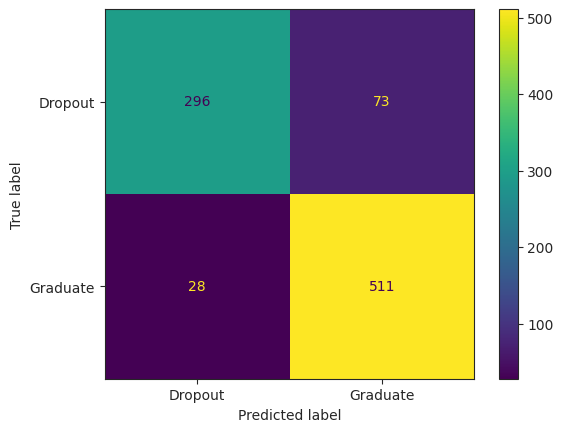

In [86]:
conf_matrix_plot(rf_opt, X_test, y_test)

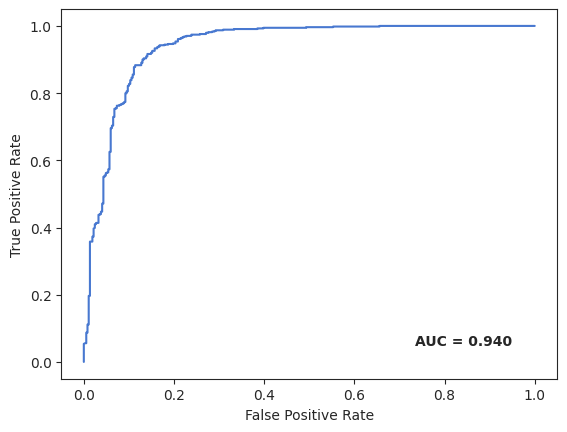

In [87]:
y_preds_prob = rf_opt.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob)

## Prediction

Now we need to predict whether a student will graduate or drop out. For this purpose, we will be using students who are currently enrolled in studies.

In [88]:
# Make a copy of a dataframe
df = students.copy()

# Keep only enrolled students.
df = df[df['Target'] == 'Enrolled']

cols = ['Application mode', 'Course', 'Previous qualification', "Mother's qualification", 'Tuition fees up to date', 
        "Mother's occupation", 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 
        'Curricular units 2nd sem (approved)']

# Make another copy of the dataframe with only relevant columns.
df_prediction = df[cols].copy()

# Convert into numerical data type.
cols = ['Tuition fees up to date', 'Gender', 'Scholarship holder']
df_prediction[cols] = df_prediction[cols].astype('int32')

# Perform one-hot encoding.
df_prediction = pd.get_dummies(df_prediction, drop_first=True)

In [89]:
# Perform prediction.
prediction = rf_opt.predict(df_prediction)

# Change enrolled to predicted outcome.
df['Target'] = prediction

df = df.replace({'Target': {0: 'Dropout', 1: 'Graduate'}})

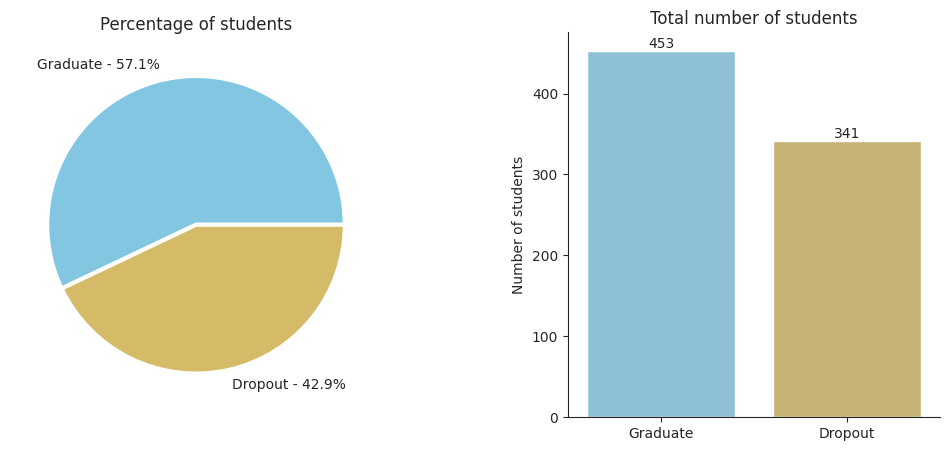

In [90]:
# Represent the predicted variable.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Target'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, 
        colors=[colors_target.get(i) for i in data.index])
ax1.set_title('Percentage of students')

# Create a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y='count', x=data.index, palette=colors_target)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.bar_label(container=ax2.containers[0], labels=df['Target'].value_counts())
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of students')

plt.show()